# Mushroom Classification

Il seguente Notebook ha lo scopo di effettuare un processo di Data Mining sul dataset  "Mushrooms Classification".

### Crediti: Matteo Greco, Vincenzo Presta.

# Introduzione


## Contesto del Progetto

I funghi rappresentano un gruppo eterogeneo di organismi con una vasta gamma di caratteristiche morfologiche, ecologiche e biochimiche. Alcuni funghi sono commestibili, mentre altri sono velenosi e potenzialmente mortali. La distinzione tra funghi commestibili e velenosi non è sempre immediata, e può richiedere una conoscenza approfondita delle loro caratteristiche specifiche.

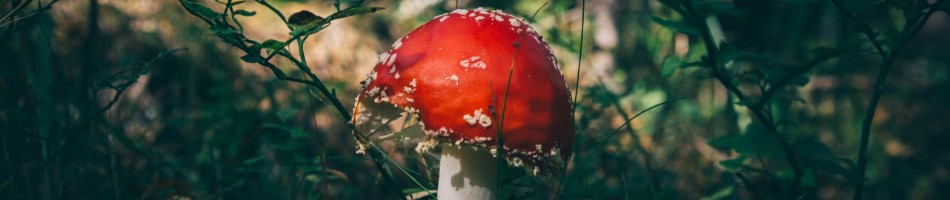

## Descrizione del Dataset

Il dataset utilizzato in questo progetto proviene da un lavoro descritto nel libro "*National Audubon Society Field Guide to North American Mushrooms* (1981)" e comprende descrizioni ipotetiche di campioni corrispondenti a 23 specie di "*gilled mushrooms*", lett. "funghi lamellati" appartenenti alle famiglie *Agaricus* e *Lepiota*. \\
Ogni specie è identificata come *commestibile* o *velenosa*.

## Caratteristiche del Dataset
Il dataset include 8124 osservazioni e 23 feature per ciascun campione di fungo. Le feature comprendono vari aspetti morfologici come la forma del cappello, il colore, la presenza di odori particolari, la dimensione delle lamelle, il colore delle spore, e molti altri fattori visivi e sensoriali.



### Caratteristiche aggiuntive degli atrributi


Di seguito sono riportati gli attributi con alcuni esempi per ognuno:
* cap-shape (forma del cappello): bell, conical, convex, flat...
* cap-surface (superficie del cappello): fibrous, scaly, smooth...
* cap-color (colore del cappello): brown, gray, red, white...
* bruises (cambio di colore alla contusione): bruises, no...
* odor (odore): almond, anise, fishy, spicy...
* gill-attachment (attaccamento delle lamelle): attached, free...
* gill-spacing (spaziatura delle lamelle): close, distant...
* gill-size (dimensione delle lamelle): broad, narrow...
* gill-color (colore delle lamelle): black, brown, pink, white...
* stalk-shape (forma del gambo): enlarging, tapering...
* stalk-root (radice del gambo): bulbous, club, missing...
* stalk-surface-above-ring (superficie del gambo sopra l'anello): fibrous, smooth...
* stalk-surface-below-ring (superficie del gambo sotto l'anello): scaly, silky...
* stalk-color-above-ring (colore del gambo sopra l'anello): brown, pink, white...
* stalk-color-below-ring (colore del gambo sotto l'anello): gray, orange, yellow...
* veil-type (tipo di velo): partial, universal...
* veil-color (colore del velo): brown, white, yellow...
* ring-number (numero di anelli): none, one, two...
* ring-type (tipo di anello): evanescent, pendant...
* spore-print-color (colore delle spore): black, chocolate, white...
* population (popolazione): abundant, solitary...
* habitat (habitat): woods, meadows, urban...
* **class (attributo di classe): edible, poisonous.**

## Sfide e Obiettivi


 Il lavoro della National Audubon Society chiarisce che non esiste una regola semplice per determinare l'edibilità di un fungo. Questo rende la classificazione dei funghi una sfida interessante. L'obiettivo principale di questo progetto è stato quindi quello di costruire un modello di machine learning che possa classificare accuratamente i funghi come commestibili o velenosi basandosi sulle loro caratteristiche.

# Setup dei dati

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
url = "https://raw.githubusercontent.com/VincenzoPresta/Mushroom_Classification/main/mushrooms.csv"
df = pd.read_csv(url)

Per una migliore visualizzazione dei dati si decide di sfruttare una copia del set di dati in cui i valori di ogni feature sono esplicitati.

In [4]:
df_copy = df.copy()

df_copy["class"] = df_copy["class"].replace({'e': 'edible', 'p': 'poisonous'})

class_mapping = {
    'e': 'edible',
    'p': 'poisonous'
}
odor_mapping = {
    'n': 'none',
    'f': 'foul',
    'y': 'fishy',
    's': 'spicy',
    'a': 'almond',
    'l': 'anise',
    'p': 'pungent',
    'c': 'creosote',
    'm': 'musty'
}
population_mapping = {
    'a': 'abundant',
    'c': 'clustered',
    'n': 'numerous',
    's': 'scattered',
    'v': 'several',
    'y': 'solitary'
}
cap_color_mapping = {
    'n': 'brown',
    'b': 'buff',
    'c': 'cinnamon',
    'g': 'gray',
    'r': 'green',
    'p': 'pink',
    'u': 'purple',
    'e': 'red',
    'w': 'white',
    'y': 'yellow'
}
cap_shape_mapping = {
    'b':
    'bell',
    'c': 'conical',
    'x': 'convex',
    'f': 'flat',
    'k': 'knobbed',
    's': 'sunken'
}
cap_surface_mapping = {
    'f': 'fibrous',
    'g': 'grooves',
    'y': 'scaly',
    's': 'smooth'
}
habitat_mapping = {
    'g': 'grasses',
    'l': 'leaves',
    'm': 'meadows',
    'p': 'paths',
    'u': 'urban',
    'w': 'waste',
    'd': 'woods'
}

ring_type_mapping = {
    'c': 'cobwebby',
    'e': 'evanescent',
    'f': 'flaring',
    'l': 'large',
    'n': 'none',
    'p': 'pendant',
    's': 'sheathing',
    'z': 'zone'
}
veil_type_mapping = {
    'p': 'partial',
    'u': 'universal'
}

bruises_mapping = {
    't': 'bruises',
    'f': 'no bruises'
}
gill_attachment_mapping = {
    'a': 'attached',
    'd': 'descending',
    'f': 'free',
    'n': 'notched'
}
gill_spacing_mapping = {
    'c': 'close',
    'w': 'crowded',
    'd': 'distant'
}
gill_size_mapping = {
    'b': 'broad',
    'n': 'narrow'
}
gill_color_mapping = {
    'k': 'black',
    'n': 'brown',
    'b': 'buff',
    'h': 'chocolate',
    'g': 'gray',
    'r': 'green',
    'o': 'orange',
    'p': 'pink',
    'u': 'purple',
    'e': 'red',
    'w': 'white',
    'y': 'yellow'
}
stalk_shape_mapping = {
    'e': 'enlarging',
    't': 'tapering'
}
stalk_root_mapping = {
    'b': 'bulbous',
    'c': 'club',
    'u': 'cup',
    'e': 'equal',
    'z': 'rhizomorphs',
    'r': 'rooted',
    '?': 'missing'
}
stalk_surface_above_ring_mapping = {
    'f': 'fibrous',
    'y': 'scaly',
    'k': 'silky',
    's': 'smooth'
}
stalk_surface_below_ring_mapping = {
    'f': 'fibrous',
    'y': 'scaly',
    'k': 'silky',
    's': 'smooth'
}
stalk_color_above_ring_mapping = {
    'n': 'brown',
    'b': 'buff',
    'c': 'cinnamon',
    'g': 'gray',
    'o': 'orange',
    'p': 'pink',
    'e': 'red',
    'w': 'white',
    'y': 'yellow'
}
stalk_color_below_ring_mapping = {
    'n': 'brown',
    'b': 'buff',
    'c': 'cinnamon',
    'g': 'gray',
    'r': 'green',
    'o': 'orange',
    'p': 'pink',
    'e': 'red',
    'w': 'white',
    'y': 'yellow'
}

veil_color_mapping = {
    'n': 'brown',
    'o': 'orange',
    'w': 'white',
    'y': 'yellow'
}
ring_number_mapping = {
    'n': 'none',
    'o': 'one',
    't': 'two'
}
spore_print_color_mapping = {
    'k': 'black',
    'n': 'brown',
    'b': 'buff',
    'h': 'chocolate',
    'r': 'green',
    'o': 'orange',
    'u': 'purple',
    'w': 'white',
    'y': 'yellow'
}

df_copy["class"]                    = df_copy["class"].replace(class_mapping)
df_copy["population"]               = df_copy["population"].replace(population_mapping)
df_copy["cap-color"]                = df_copy["cap-color"].replace(cap_color_mapping)
df_copy["odor"]                     = df_copy["odor"].replace(odor_mapping)
df_copy["cap-shape"]                = df_copy["cap-shape"].replace(cap_shape_mapping)
df_copy["cap-surface"]              = df_copy["cap-surface"].replace(cap_surface_mapping)
df_copy["habitat"]                  = df_copy["habitat"].replace(habitat_mapping)
df_copy["ring-type"]                = df_copy["ring-type"].replace(ring_type_mapping)
df_copy["ring-number"]              = df_copy["ring-number"].replace(ring_number_mapping)
df_copy["veil-type"]                = df_copy["veil-type"].replace(veil_type_mapping)
df_copy["veil-color"]               = df_copy["veil-color"].replace(veil_color_mapping)
df_copy["bruises"]                  = df_copy["bruises"].replace(bruises_mapping)
df_copy["gill-attachment"]          = df_copy["gill-attachment"].replace(gill_attachment_mapping)
df_copy["gill-spacing"]             = df_copy["gill-spacing"].replace(gill_spacing_mapping)
df_copy["gill-color"]               = df_copy["gill-color"].replace(gill_color_mapping)
df_copy["stalk-shape"]              = df_copy["stalk-shape"].replace(stalk_shape_mapping)
df_copy["stalk-root"]               = df_copy["stalk-root"].replace(stalk_root_mapping)
df_copy["stalk-surface-above-ring"] = df_copy["stalk-surface-above-ring"].replace(stalk_surface_above_ring_mapping)
df_copy["stalk-surface-below-ring"] = df_copy["stalk-surface-below-ring"].replace(stalk_surface_below_ring_mapping)
df_copy["stalk-color-above-ring"]   = df_copy["stalk-color-above-ring"].replace(stalk_color_above_ring_mapping)
df_copy["stalk-color-below-ring"]   = df_copy["stalk-color-below-ring"].replace(stalk_color_below_ring_mapping)
df_copy["spore-print-color"]        = df_copy["spore-print-color"].replace(spore_print_color_mapping)

# Esplorazione e visualizzazione dei dati

In [5]:
df.shape

(8124, 23)

Il dataset è composto da 8124 istanze e 23 feature.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

Da queste informazioni preliminari si evince che:
* tutti gli attributi sono di tipo categorico.
* assenza di valori mancanti per tutti gli attributi.

## Analisi distribuzione della variabile target

Di fondamentale importanza è verificare che il dataset sia bilanciato, cioè che non vi sia una grande prevalenza di istanze afferenti a una classe piuttosto che all'altra.

In [7]:
df_copy["class"].value_counts()

class
edible       4208
poisonous    3916
Name: count, dtype: int64

Si nota che non vi è sbilanciamento tra le classi seppur il numero di istanze classificate "edible" è leggermente maggiore rispetto al numero di istanze classificate "poisonous", si sfrutta comunque un plot per ottenere la distribuzione dei due valori in termini percentuali.

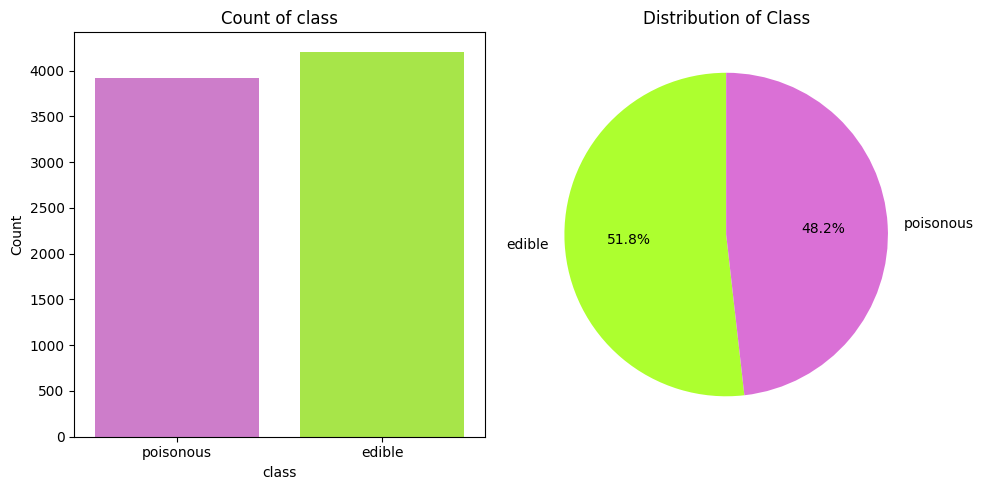

In [8]:
colors = ['#DA70D6', '#ADFF2F']  #red and green
colors_pie = ['#ADFF2F', '#DA70D6']

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

#count plot
sns.countplot(data=df_copy, x='class', hue='class', palette=colors, ax=axes[0], legend=False)
axes[0].set_title('Count of class')
axes[0].set_xlabel('class')
axes[0].set_ylabel('Count')

#pie plot
value_counts = df_copy['class'].value_counts()
axes[1].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90, colors=colors_pie)
axes[1].set_title('Distribution of Class')

plt.tight_layout()
plt.show()

## Analisi distribuzione attributi

Si definisce una funzione ausiliaria il cui compito è quello di creare due plot:
* grafico a torta rappresentativo della distribuzione della feature in esame.
* grafico a barre rappresentativo del conteggio delle istanze (divise per positive e negative) per ogni valore della feature.

In [9]:
def autolabel(bars, ax, rotation=0): #etichetta sopra ogni barra
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', rotation=rotation)

def plot_combined(dataframe, column_name):

    feature = dataframe[column_name].value_counts()
    feature_labels = feature.index.tolist()
    feature_sizes = feature.values.tolist()

    poisonous = []
    edible = []

    for value in feature_labels:
        size = len(dataframe[dataframe[column_name] == value].index)
        edibles = len(dataframe[(dataframe[column_name] == value) & (dataframe['class'] == 'edible')].index)
        edible.append(edibles)
        poisonous.append(size - edibles)

    ind = np.arange(len(feature_labels))
    width = 0.40

    fig, axes = plt.subplots(1, 2, figsize=(18, 7))

    # Grafico a torta
    total = sum(feature_sizes)
    feature_percentages = [size / total * 100 for size in feature_sizes]

    filtered_feature_sizes = [size for size, perc in zip(feature_sizes, feature_percentages) if perc >= 3]
    filtered_feature_labels = [label for label, perc in zip(feature_labels, feature_percentages) if perc >= 3]
    others_size = sum(size for size, perc in zip(feature_sizes, feature_percentages) if perc < 3)

    if others_size > 0:
        filtered_feature_sizes.append(others_size)
        filtered_feature_labels.append('others')

    pie_colors = ['#1f77b4', '#ff7f0e', '#9467bd', '#8c564b', '#7f7f7f', '#bcbd22', '#17becf', '#f7b6d2', '#c7c7c7']
    ax2 = axes[0]
    ax2.pie(filtered_feature_sizes, labels=filtered_feature_labels, autopct='%1.2f%%', startangle=90, colors=pie_colors)
    ax2.set_title(f'Value distribution of {column_name}', fontsize=22)


    # Grafico a barre
    ax1 = axes[1]
    edible_bars = ax1.bar(ind, edible, width, color='#ADFF2F')
    poison_bars = ax1.bar(ind + width, poisonous, width, color='#DA70D6')

    ax1.set_xlabel(column_name, fontsize=20)
    ax1.set_ylabel('Quantity', fontsize=20)
    ax1.set_title(f'Edible and Poisonous Mushrooms based on {column_name}', fontsize=22)
    ax1.set_xticks(ind + width / 2)
    ax1.set_xticklabels(tuple(feature_labels), fontsize=12)
    ax1.legend((edible_bars, poison_bars), ('edible', 'poisonous'), fontsize=17)

    autolabel(edible_bars, ax1)
    autolabel(poison_bars, ax1)


    plt.tight_layout()
    plt.show()

    for label, percentage in zip(feature_labels, (size/total*100 for size in feature_sizes)):
        print(f"{label}: {percentage:.2f}%")

Si effettuano quindi i plot con la funzione appena definita sfuttandoli per notare preliminarmente situazioni patologiche sulle distribuzioni dei valori e per cercare eventuali legami stretti tra le feature e la variabile target da confermare con una successiva analisi della correlazione.

#### cap-shape

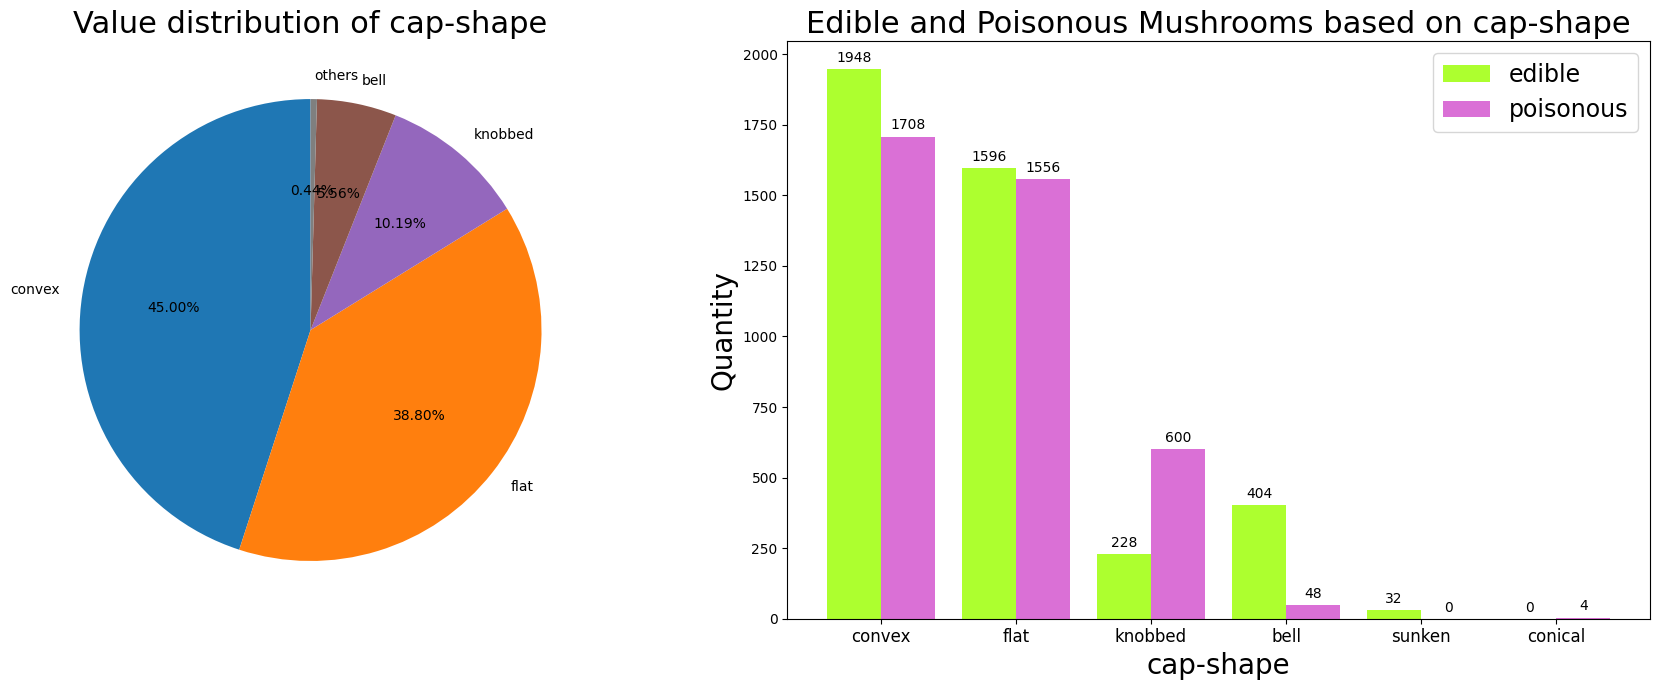

convex: 45.00%
flat: 38.80%
knobbed: 10.19%
bell: 5.56%
sunken: 0.39%
conical: 0.05%


In [10]:
plot_combined(df_copy,'cap-shape')

#### cap-surface

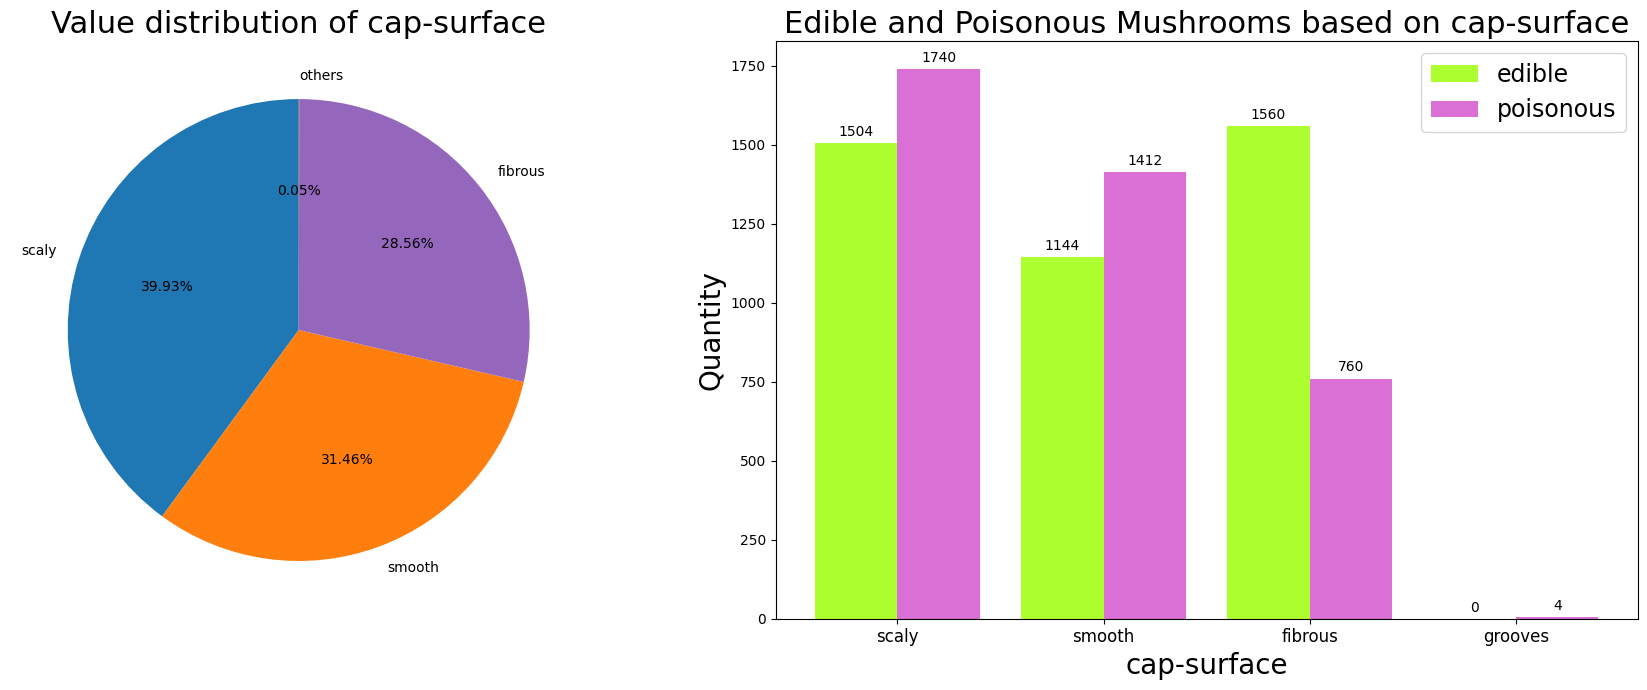

scaly: 39.93%
smooth: 31.46%
fibrous: 28.56%
grooves: 0.05%


In [11]:
plot_combined(df_copy,'cap-surface')

#### cap-color

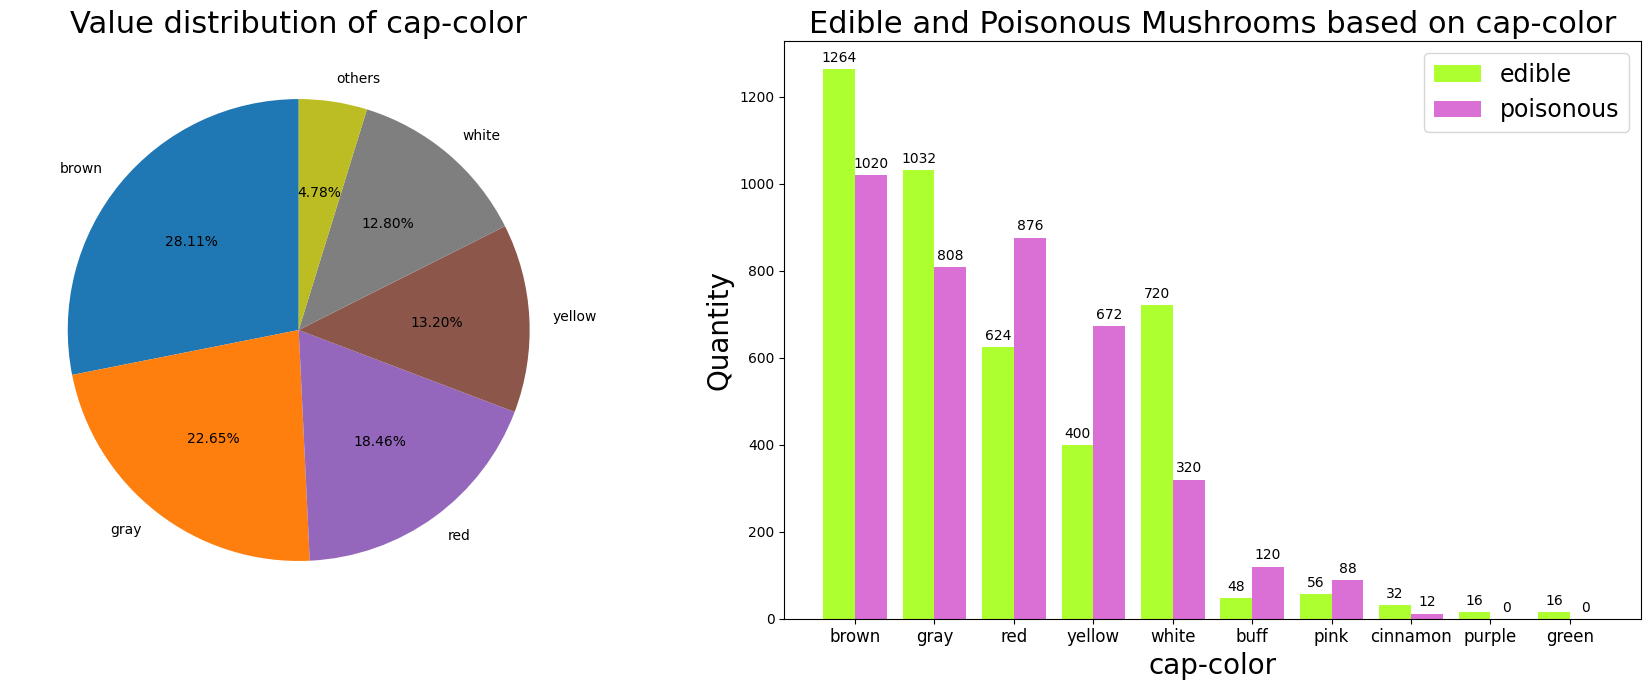

brown: 28.11%
gray: 22.65%
red: 18.46%
yellow: 13.20%
white: 12.80%
buff: 2.07%
pink: 1.77%
cinnamon: 0.54%
purple: 0.20%
green: 0.20%


In [13]:
plot_combined(df_copy,'cap-color')

#### bruises

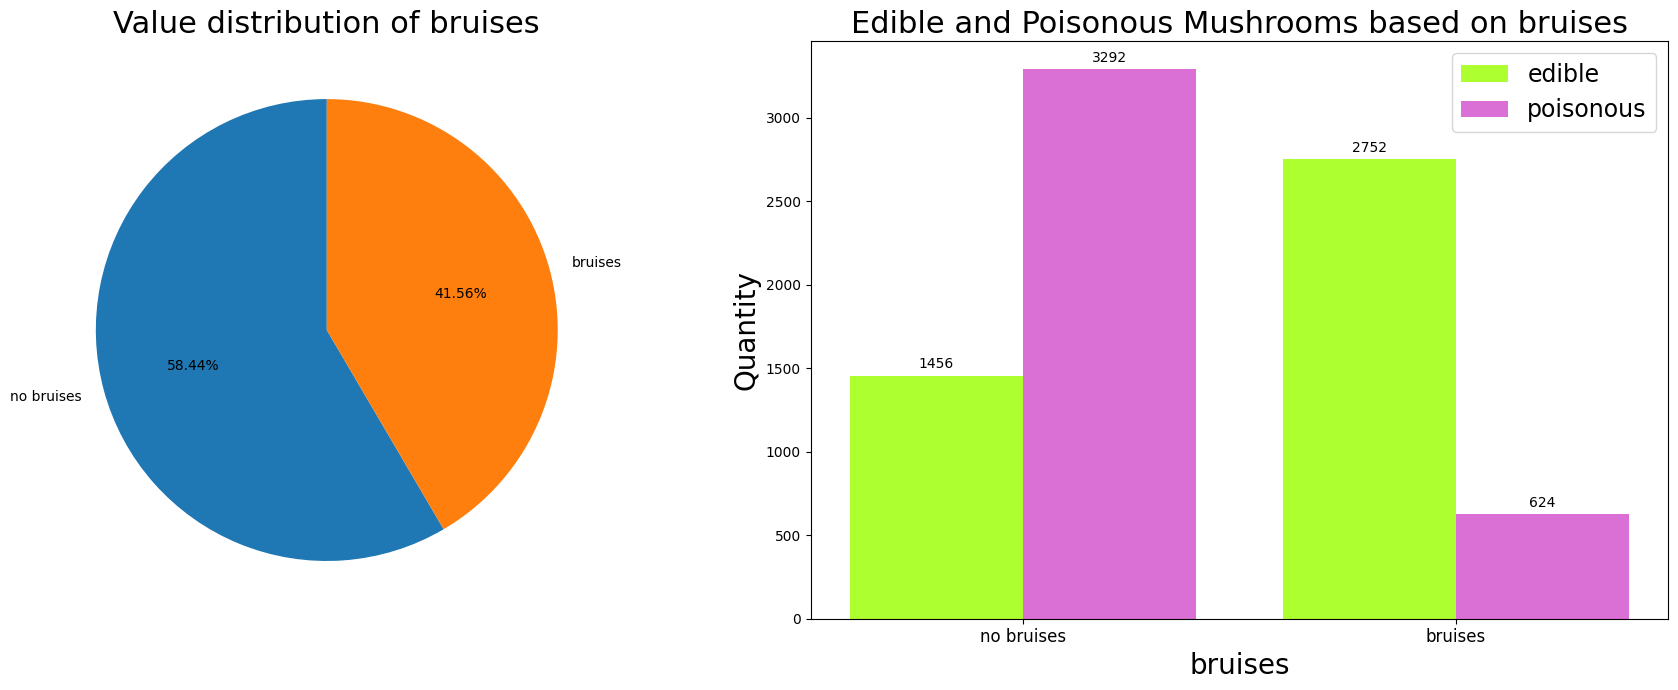

no bruises: 58.44%
bruises: 41.56%


In [14]:
plot_combined(df_copy,'bruises')

La colonna bruises ha un elevato contenuto informativo ai fini della variabile target:
* un'istanza con valore "no bruises" è molto più probabile sia etichettata con "poisonous".
* un'istanza con valore "bruises" è molto più probabile sia etichettata con "edible".


#### odor

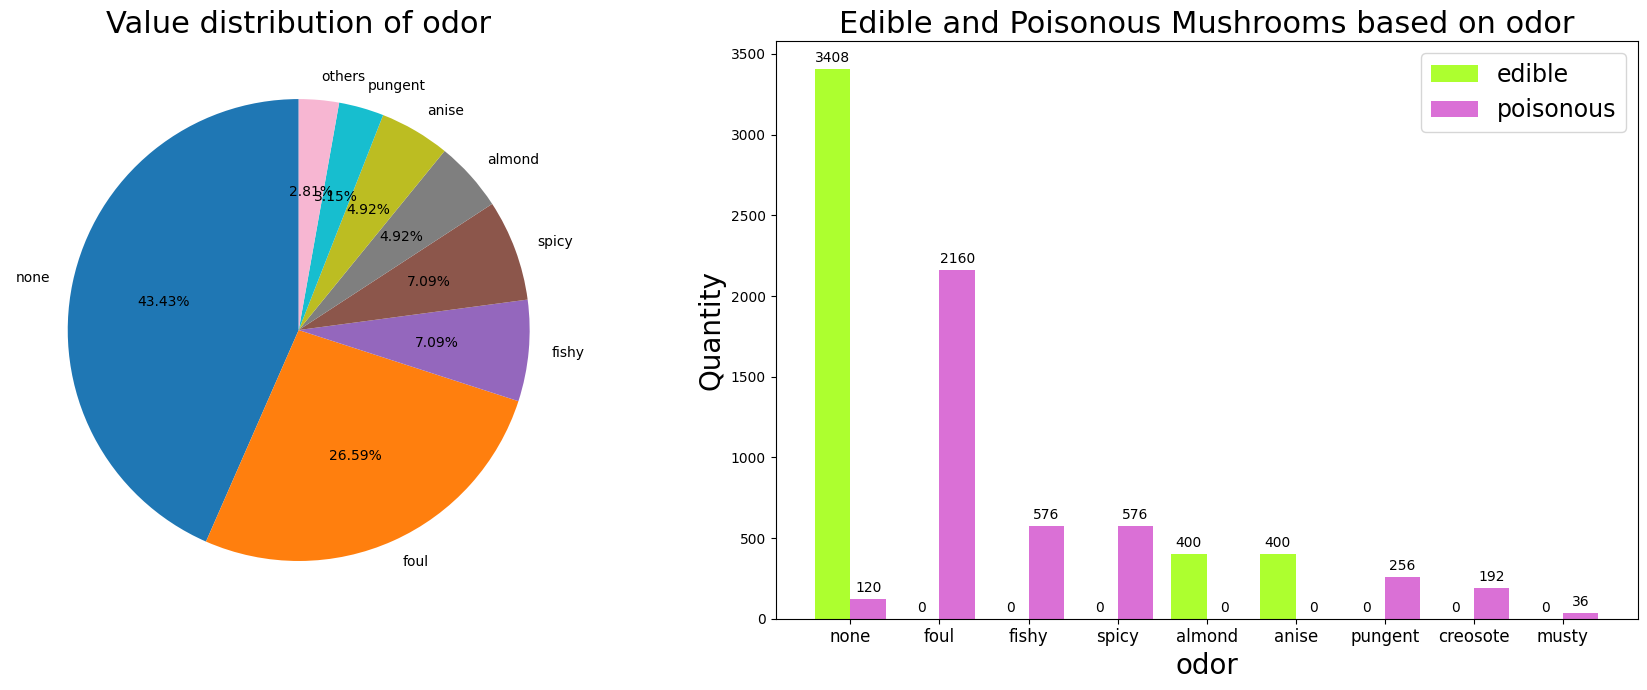

none: 43.43%
foul: 26.59%
fishy: 7.09%
spicy: 7.09%
almond: 4.92%
anise: 4.92%
pungent: 3.15%
creosote: 2.36%
musty: 0.44%


In [17]:
plot_combined(df_copy,'odor')

Dall'analisi del grafico a destra, è immediato notare per la feature "odor" l'altissimo contenuto informativo per ricavare la classe di un'istanza;   infatti, si può notare come:
* istanze con valore "none" sono tutte etichettate come "edible" a meno di una piccolissima percentuale.
* istanze con valore "almond" e "anise" sono etichettate tutte come "edible".
* istanze con valore "foul", "fishy", "spicy", "pungent", "creosote", "musty" sono etichettate tutte come "poisonous".

Questo comportamento può semplificare di molto il compito di classificazione in quanto i modelli potrebbero basarsi molto su questa variabile.

In termini di correlazione ci si aspetta un valore molto elevato.


#### gill-attachment

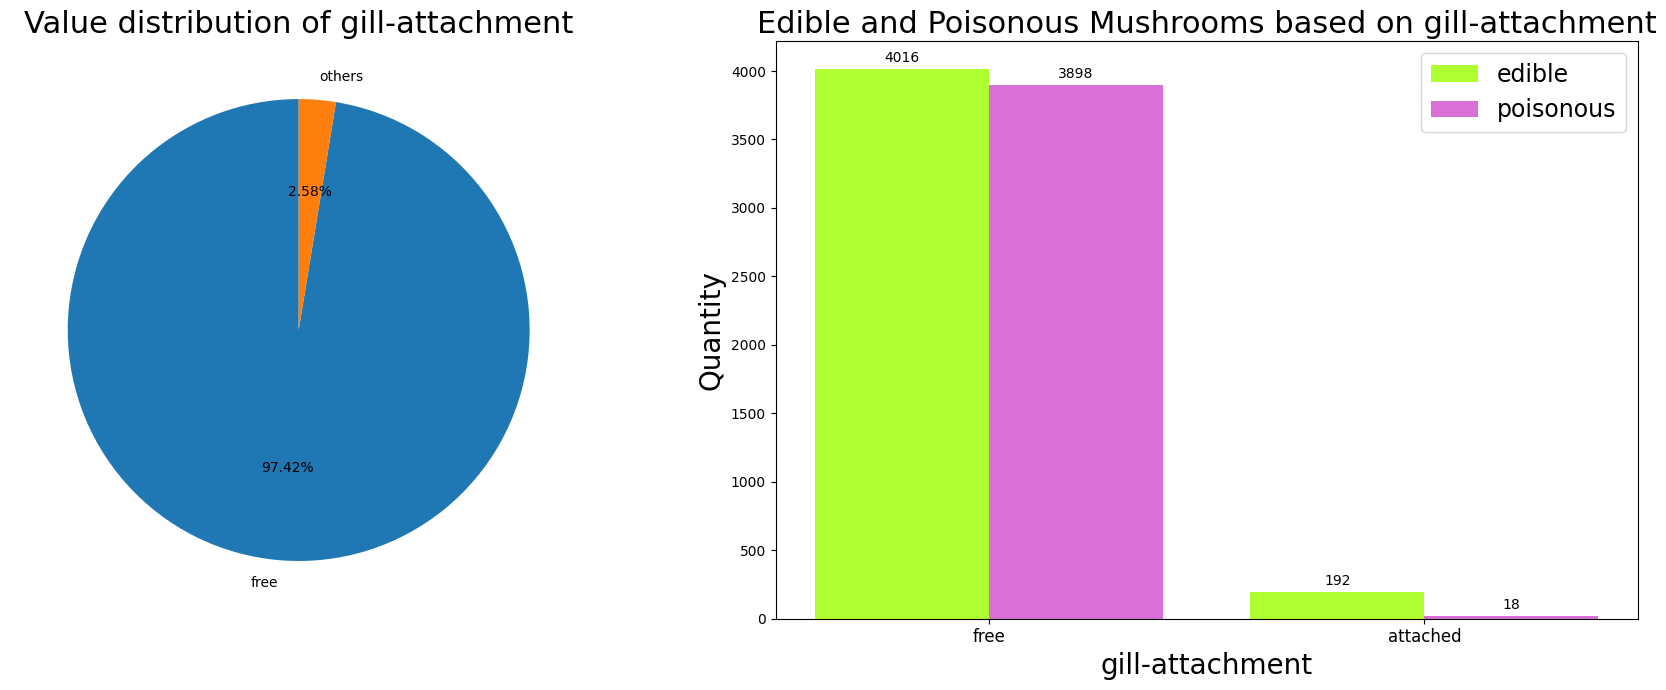

free: 97.42%
attached: 2.58%


In [18]:
plot_combined(df_copy,'gill-attachment')

Si nota la presenza di un attributo con elevata frequenza rispetto all'altro ma con un comportamento bilanciato rispetto alla variabile target.

#### gill-spacing

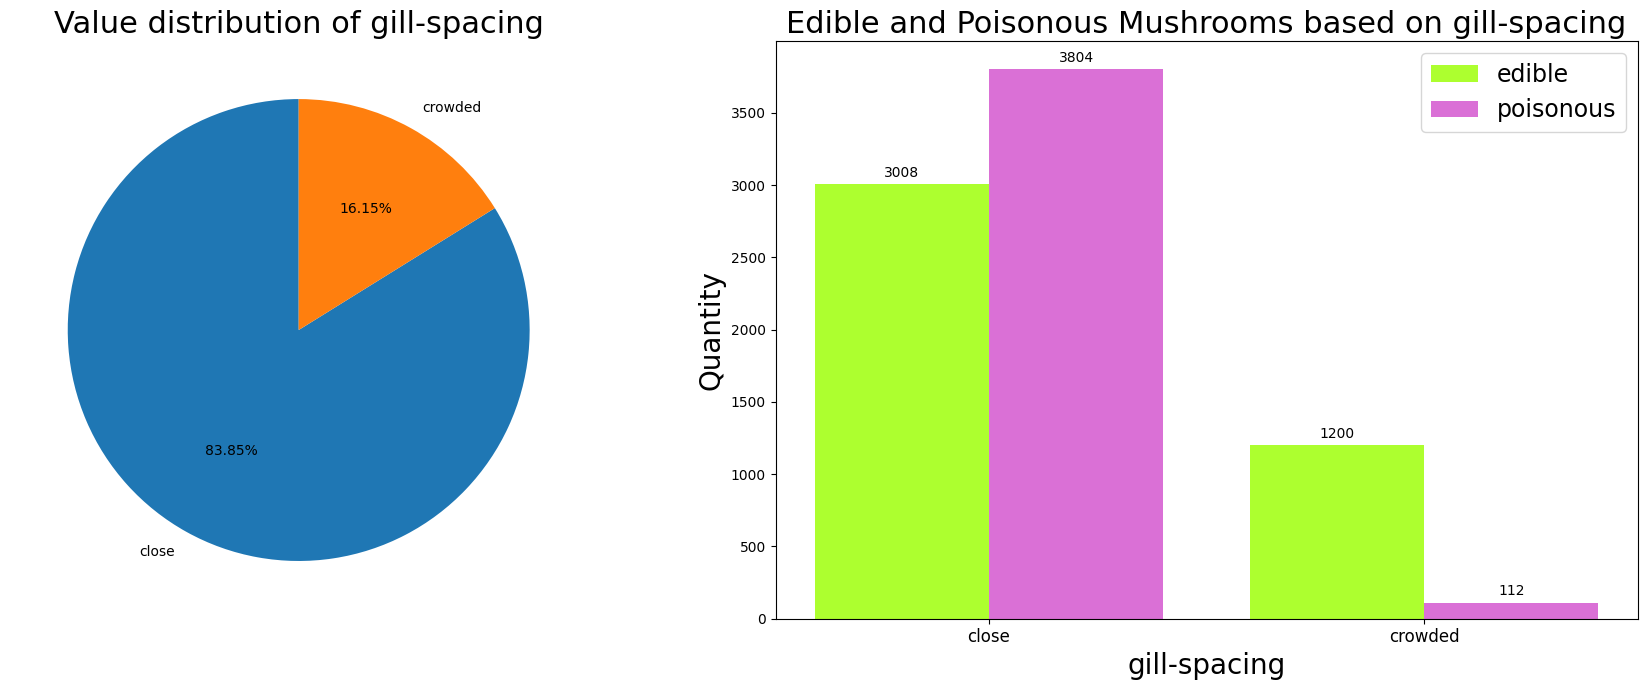

close: 83.85%
crowded: 16.15%


In [19]:
plot_combined(df_copy,'gill-spacing')

#### gill-size

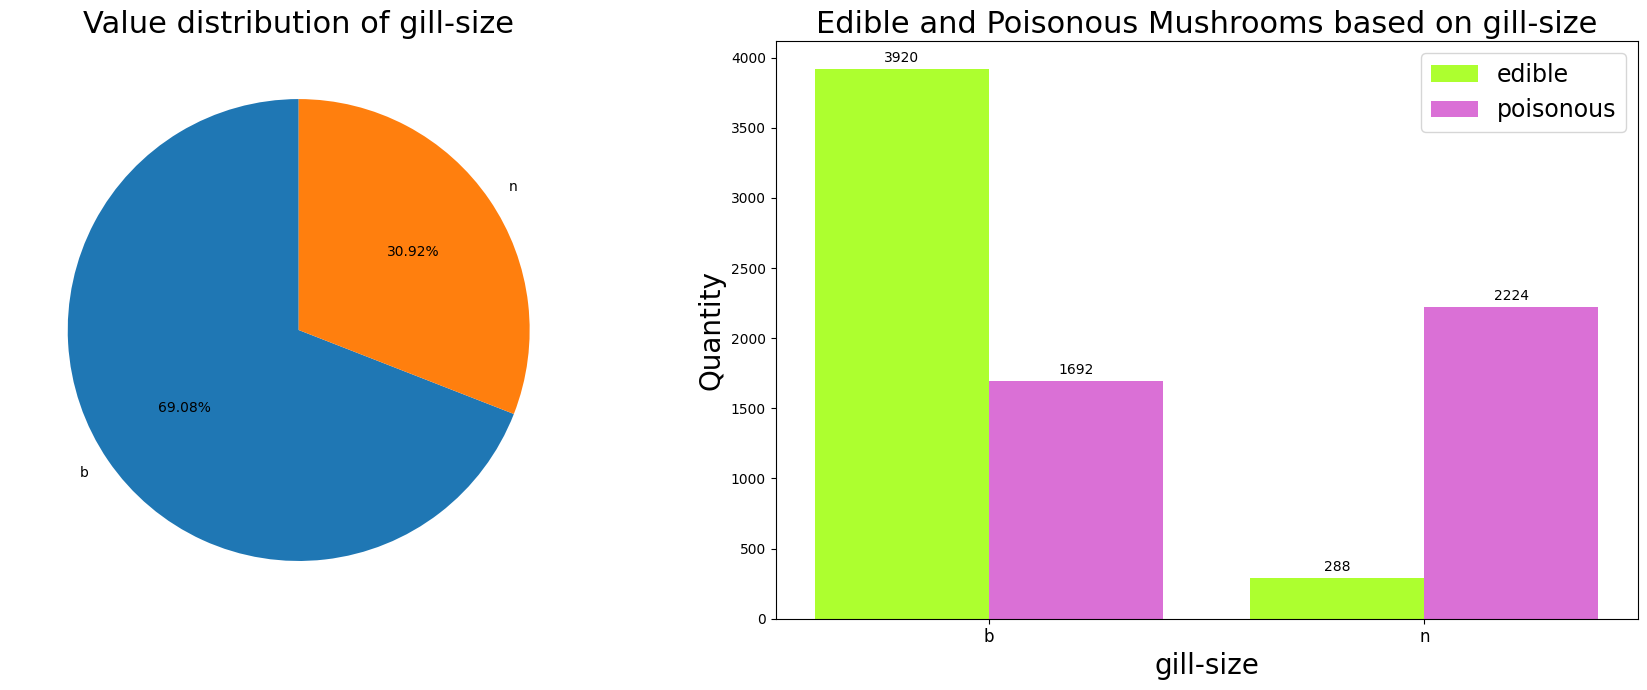

b: 69.08%
n: 30.92%


In [20]:
plot_combined(df_copy,'gill-size')

#### gill-color

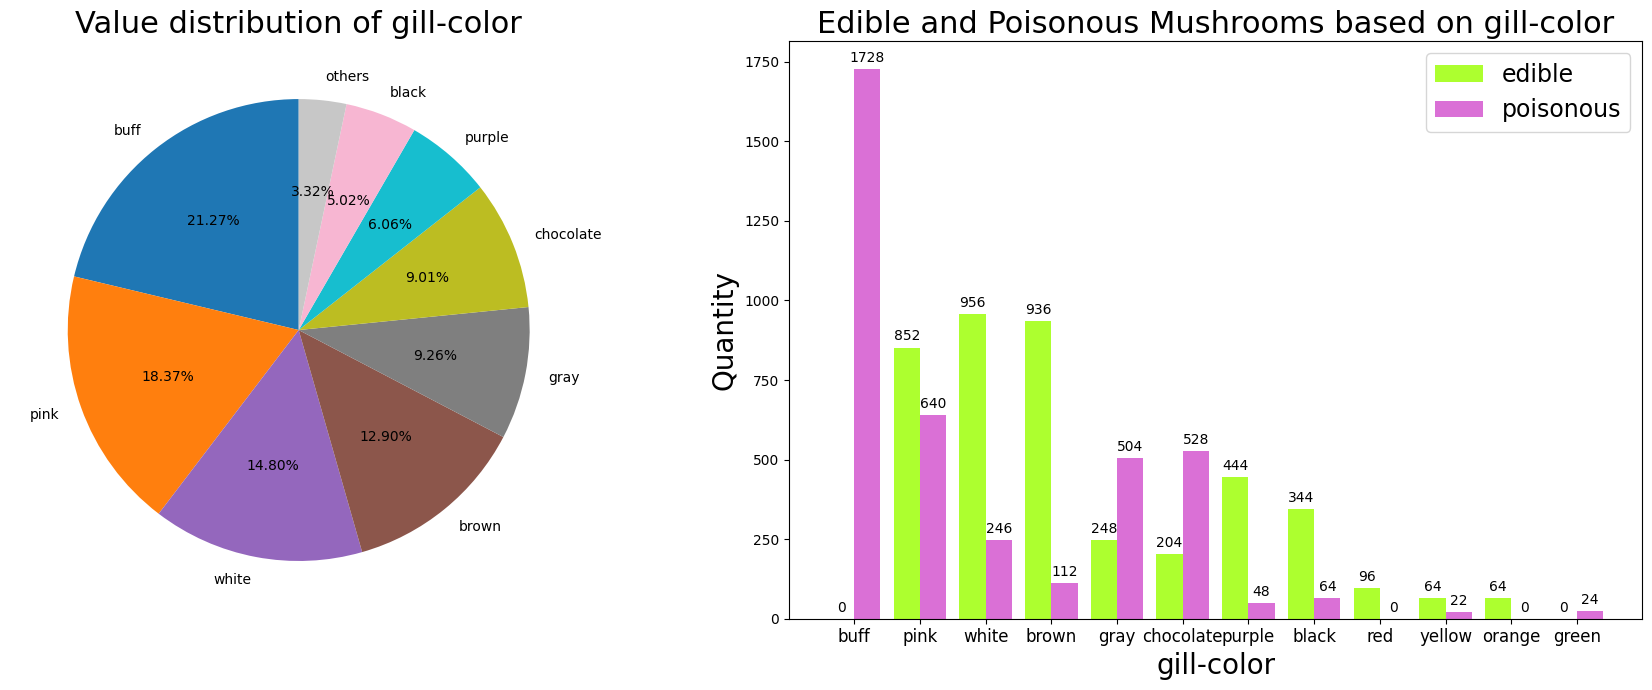

buff: 21.27%
pink: 18.37%
white: 14.80%
brown: 12.90%
gray: 9.26%
chocolate: 9.01%
purple: 6.06%
black: 5.02%
red: 1.18%
yellow: 1.06%
orange: 0.79%
green: 0.30%


In [21]:
plot_combined(df_copy,'gill-color')

La feature "gill-color", come si evince dal plot, sembra avere una buona correlazione con la variabile target. \\
Tale correlazione non risulta estrema come nel caso di "odor" ma ci si aspetta da questa feature un discreto valore di correlazione con l'attributo di classe. \\
Si evidenzia inoltre :
* totale sbilanciamento per il valore "buff", che presenta il 100% di istanze "poisonous", così come "green"
* totale sbilanciamento per i valori "orange" e "red" che presentano una totalità di istanze "edible"  (seppur in numero ridotto rispetto a "buff").

Oltre a questi casi "estremi" per tutti i valori della feature vi è uno sbilanciamento tra i due valori dell'attributo di classe.

#### stalk-shape

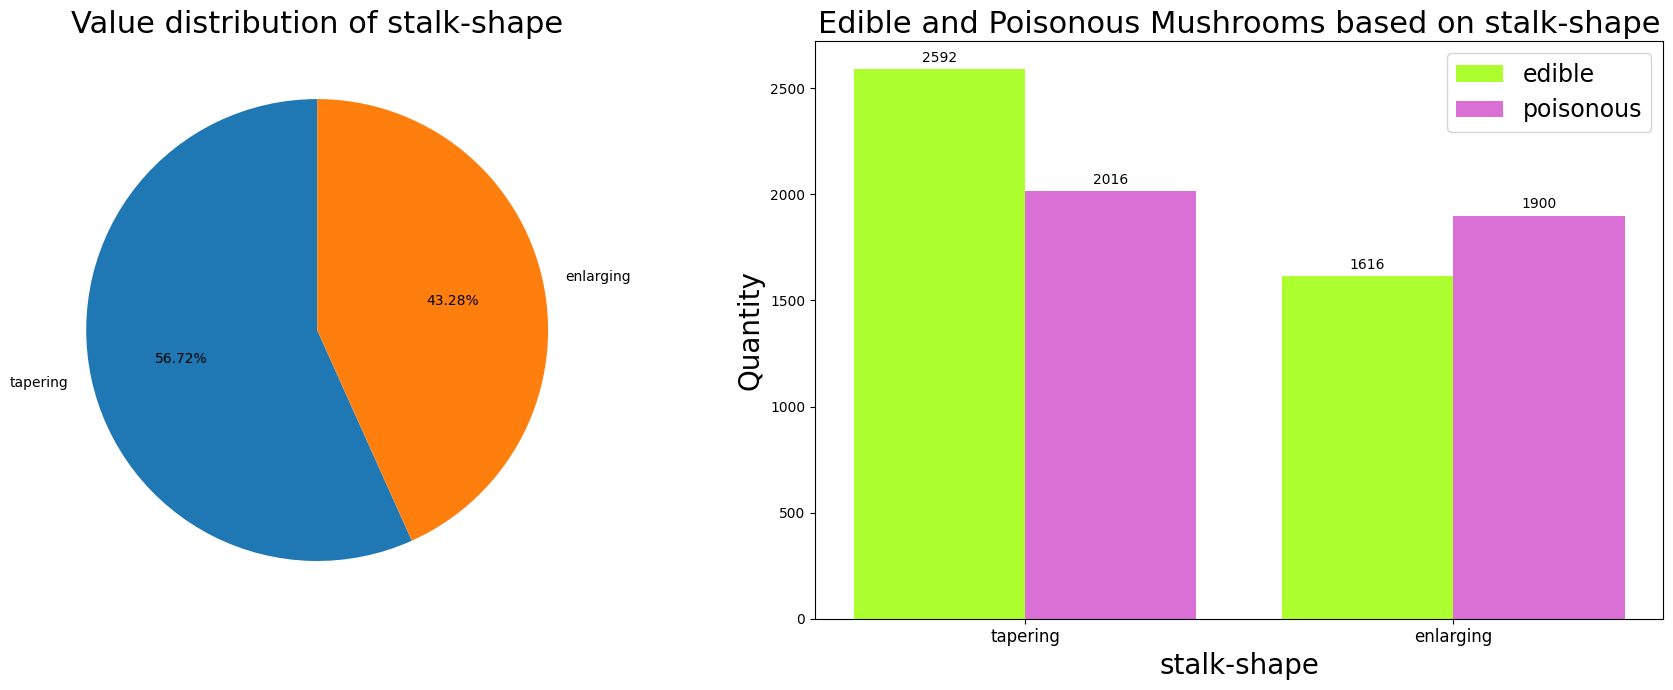

tapering: 56.72%
enlarging: 43.28%


In [22]:
plot_combined(df_copy,'stalk-shape')

#### stalk-root

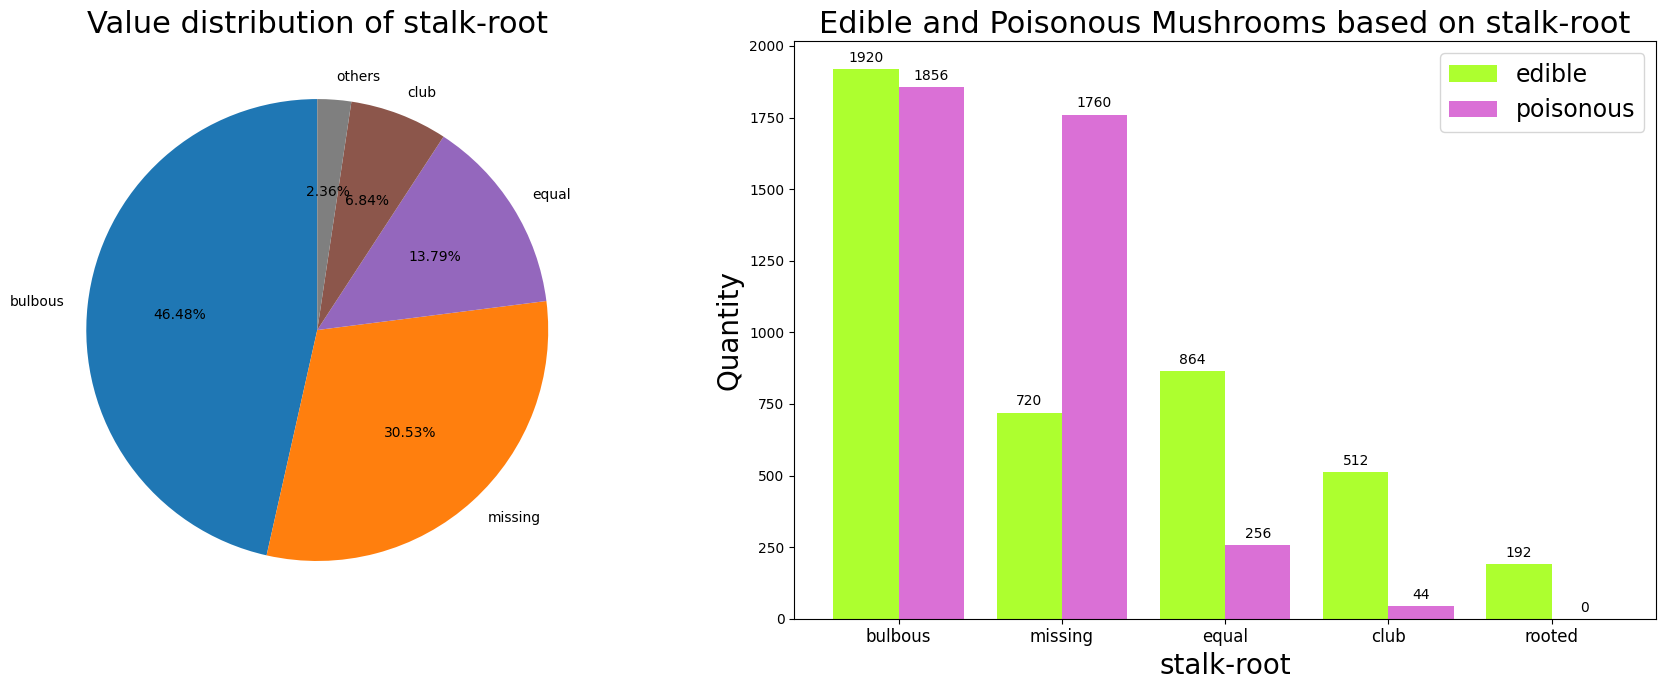

bulbous: 46.48%
missing: 30.53%
equal: 13.79%
club: 6.84%
rooted: 2.36%


In [23]:
plot_combined(df_copy,'stalk-root')

#### stalk-surface-above-ring

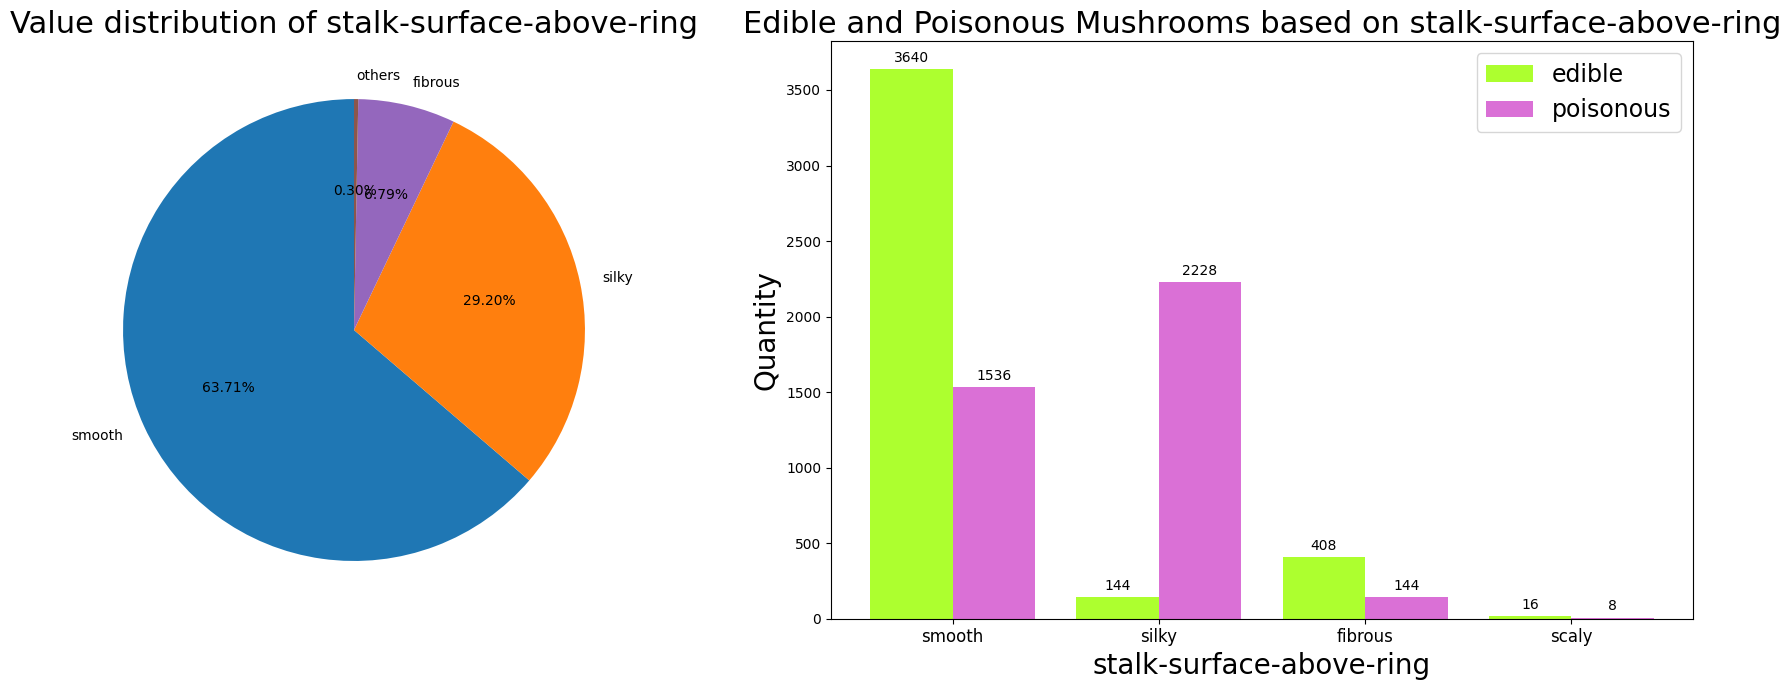

smooth: 63.71%
silky: 29.20%
fibrous: 6.79%
scaly: 0.30%


In [24]:
plot_combined(df_copy,'stalk-surface-above-ring')


La feature "stalk-surface-above-ring" dal conteggio delle istanze positive e negative per ciascun valore sembra avere una discreta associazione con la variabile target, da confermare con un'analisi approfondita.

Si può ipotizzare che anche la feature "stalk-surface-below-ring" abbia un comportamento simile in quanto le due feature si riferiscono rispettivamente al tipo di superficie sopra o sotto dell'anello.

#### stalk-surface-below-ring

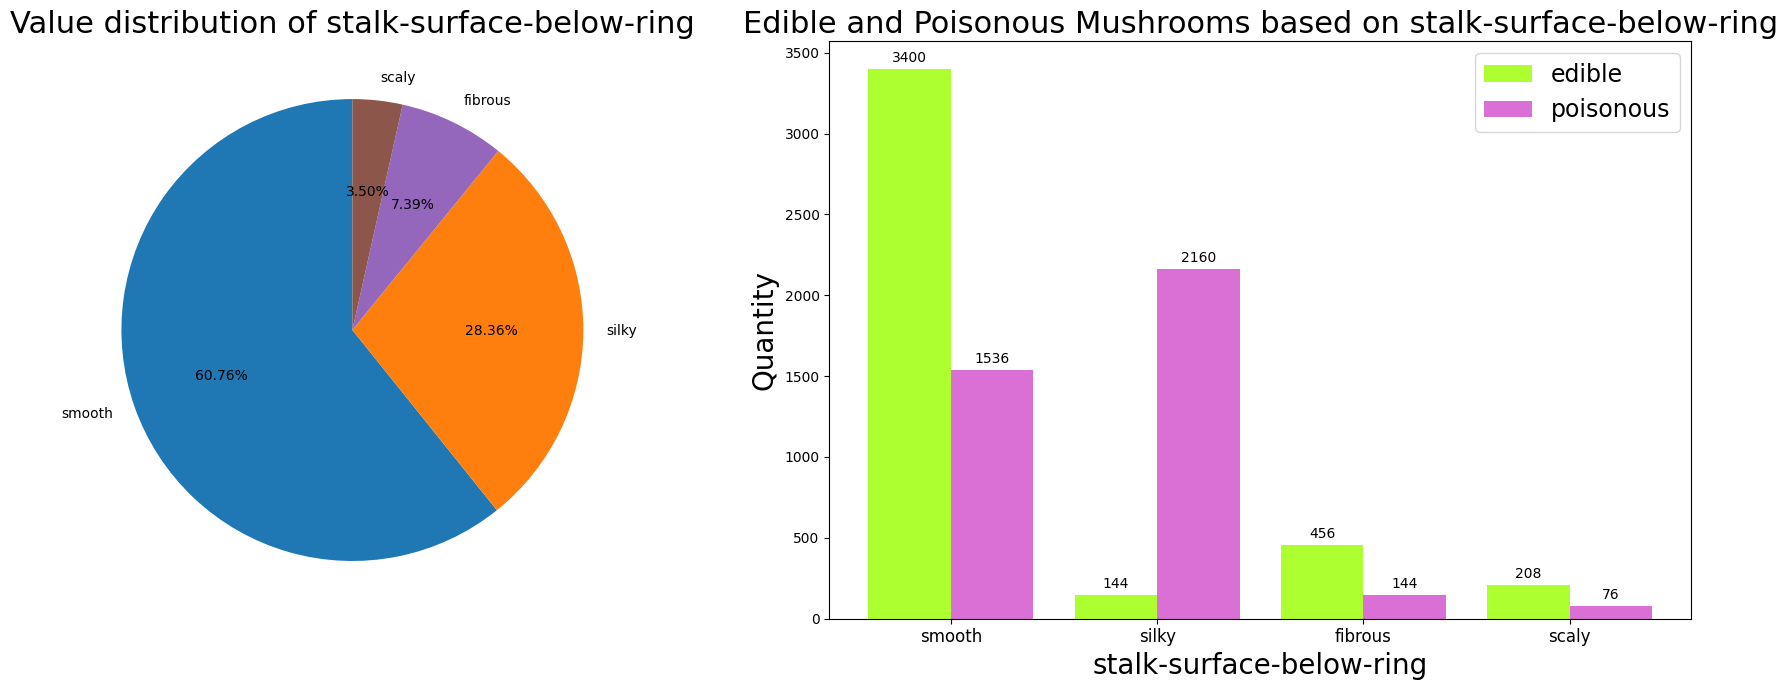

smooth: 60.76%
silky: 28.36%
fibrous: 7.39%
scaly: 3.50%


In [25]:
plot_combined(df_copy,'stalk-surface-below-ring')

Anche la feature "stalk-surface-above-ring" sembra avere una discreta associazione con la variabile target, come ipotizzato precedentemente.

Ci si aspetta di conseguenza un valore non trascurabile di correlazione con la variabile di classe.

#### stalk-color-above-ring

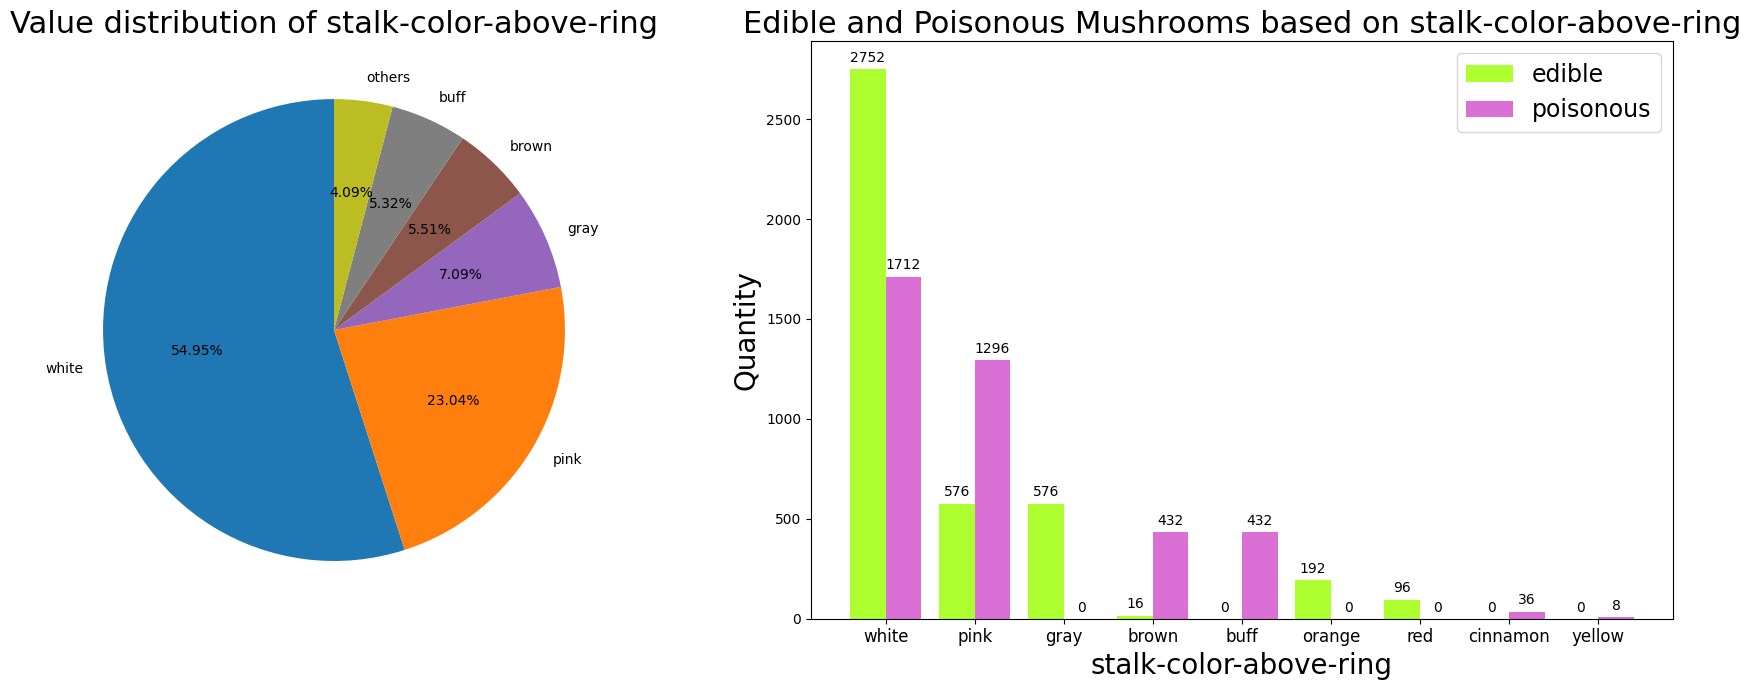

white: 54.95%
pink: 23.04%
gray: 7.09%
brown: 5.51%
buff: 5.32%
orange: 2.36%
red: 1.18%
cinnamon: 0.44%
yellow: 0.10%


In [26]:
plot_combined(df_copy,'stalk-color-above-ring')

#### stalk-color-below-ring

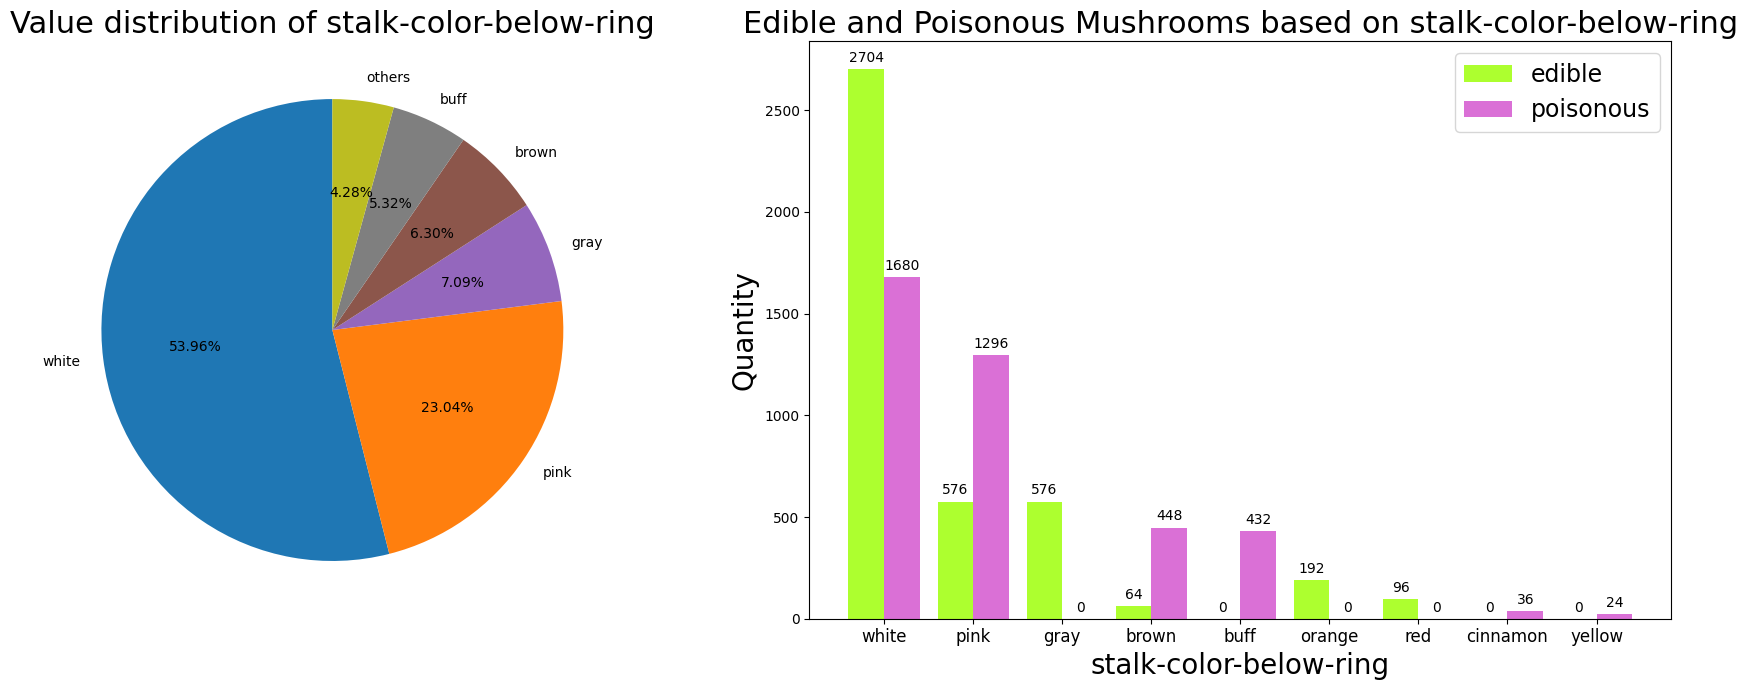

white: 53.96%
pink: 23.04%
gray: 7.09%
brown: 6.30%
buff: 5.32%
orange: 2.36%
red: 1.18%
cinnamon: 0.44%
yellow: 0.30%


In [27]:
plot_combined(df_copy,'stalk-color-below-ring')

#### veil-type

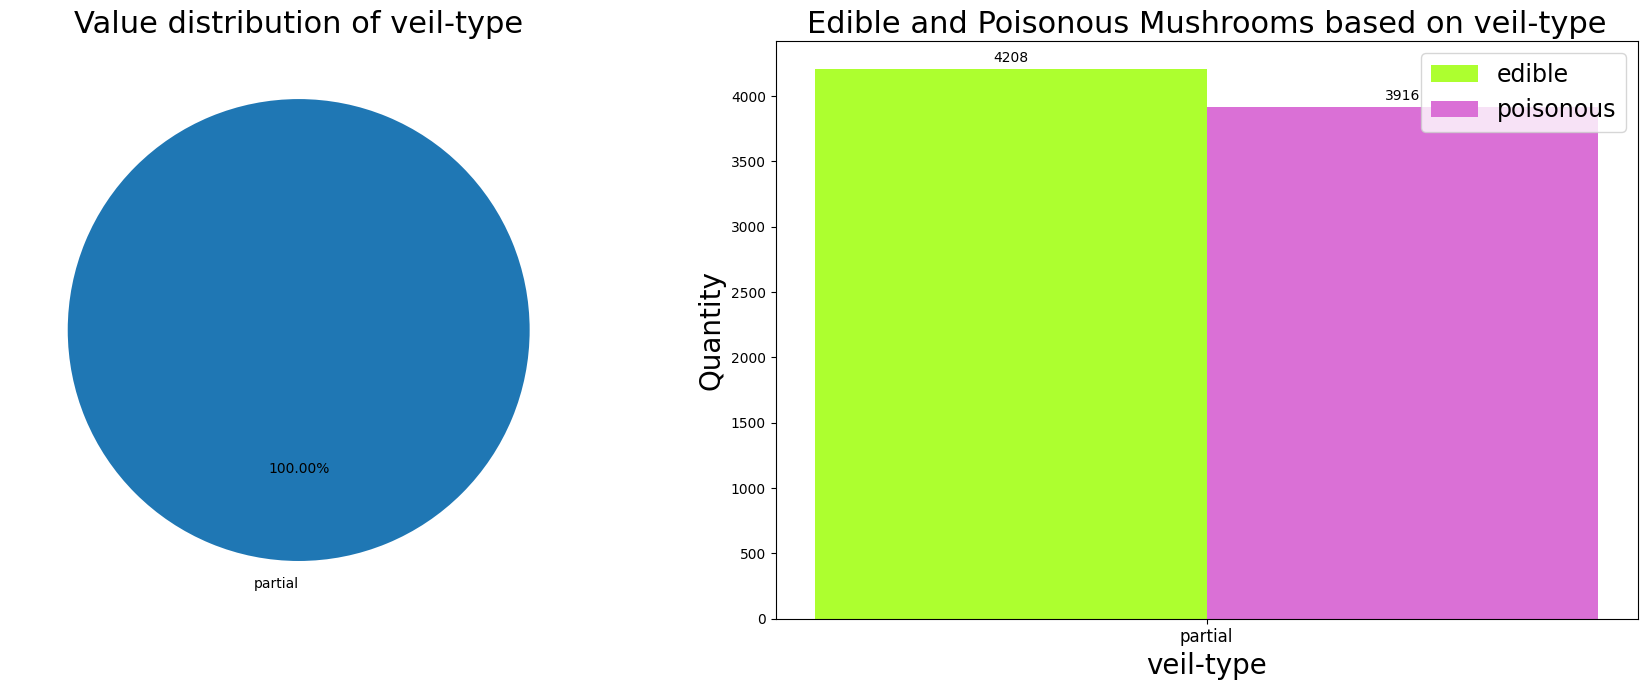

partial: 100.00%


In [28]:
plot_combined(df_copy,'veil-type')

La colonna veil-type presenta un solo valore per tutte le istanze. Si ipotizza quindi che questo attributo possa non essere considerato, in quanto il suo contenuto informativo ai fini della classificazione è nullo.

In [29]:
df = df.drop(['veil-type'],axis=1)

#### veil-color

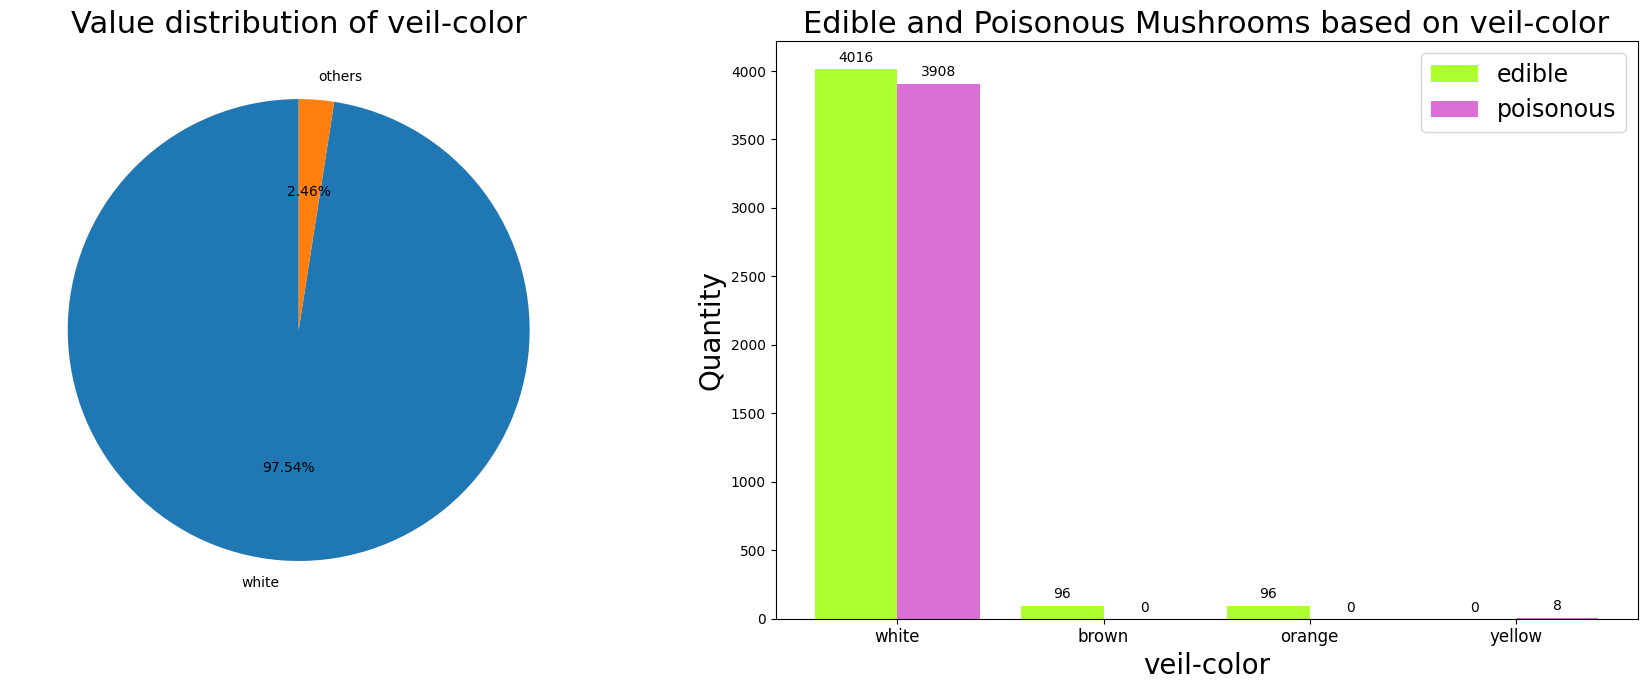

white: 97.54%
brown: 1.18%
orange: 1.18%
yellow: 0.10%


In [30]:
plot_combined(df_copy,'veil-color')

#### ring-number

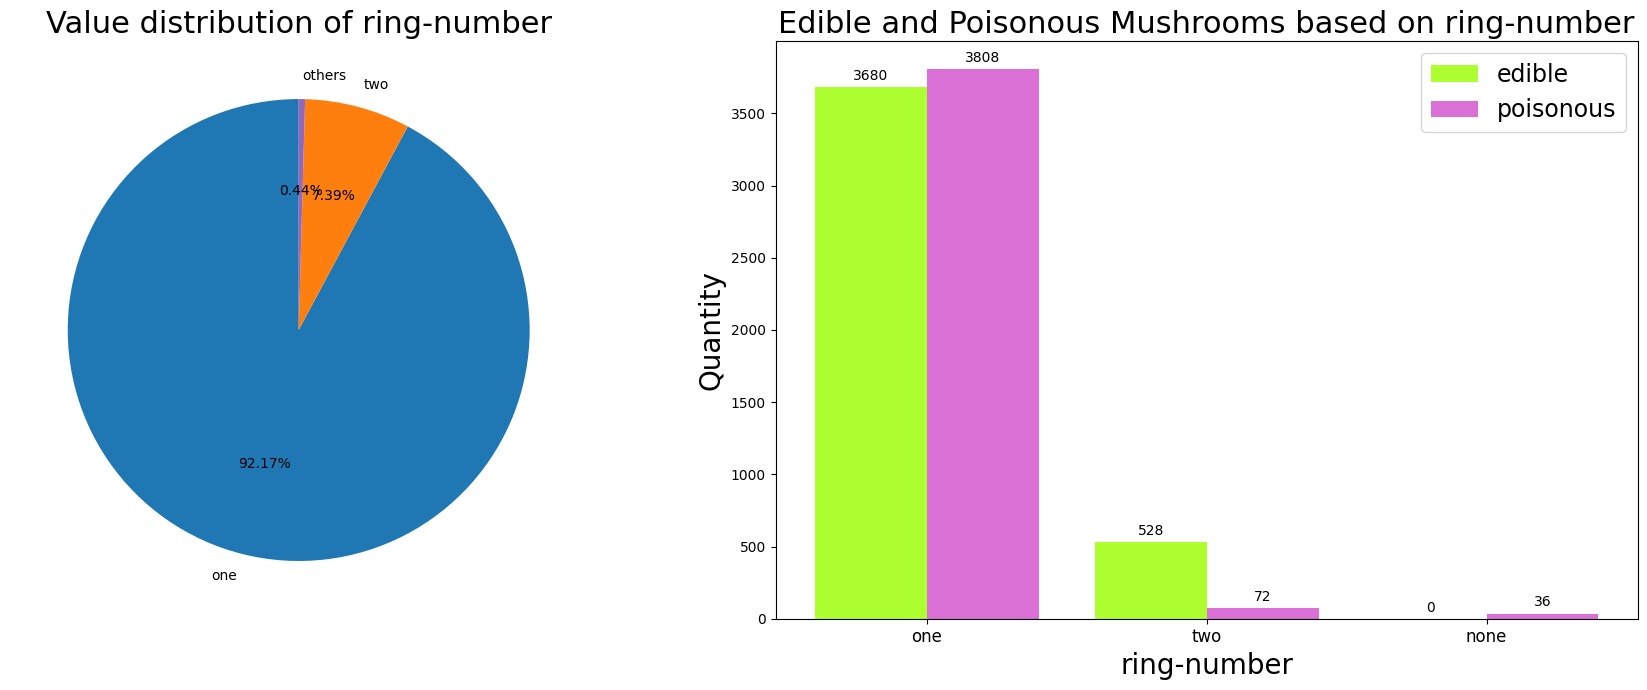

one: 92.17%
two: 7.39%
none: 0.44%


In [31]:
plot_combined(df_copy,'ring-number')

#### ring-type

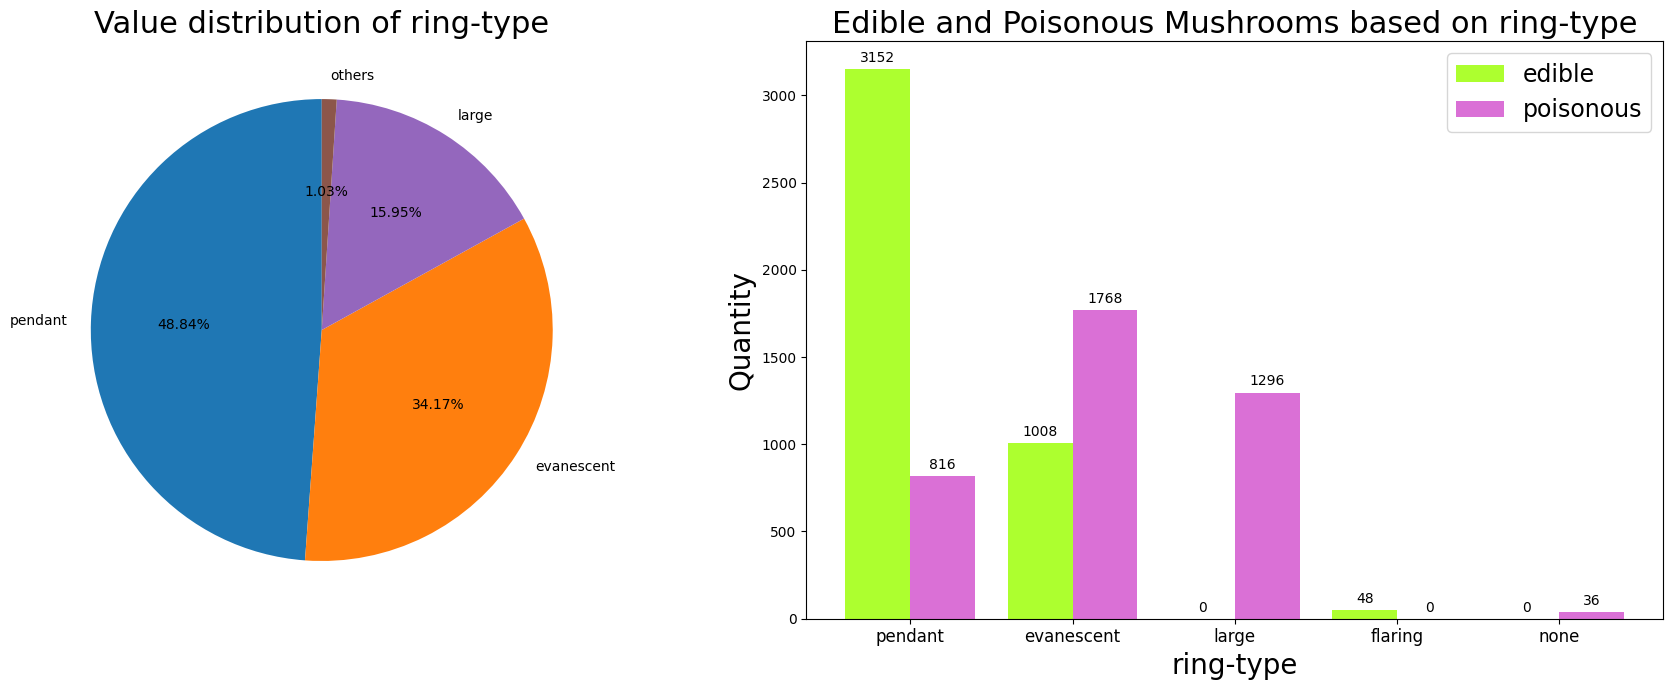

pendant: 48.84%
evanescent: 34.17%
large: 15.95%
flaring: 0.59%
none: 0.44%


In [32]:
plot_combined(df_copy,'ring-type')

#### spore-print-color

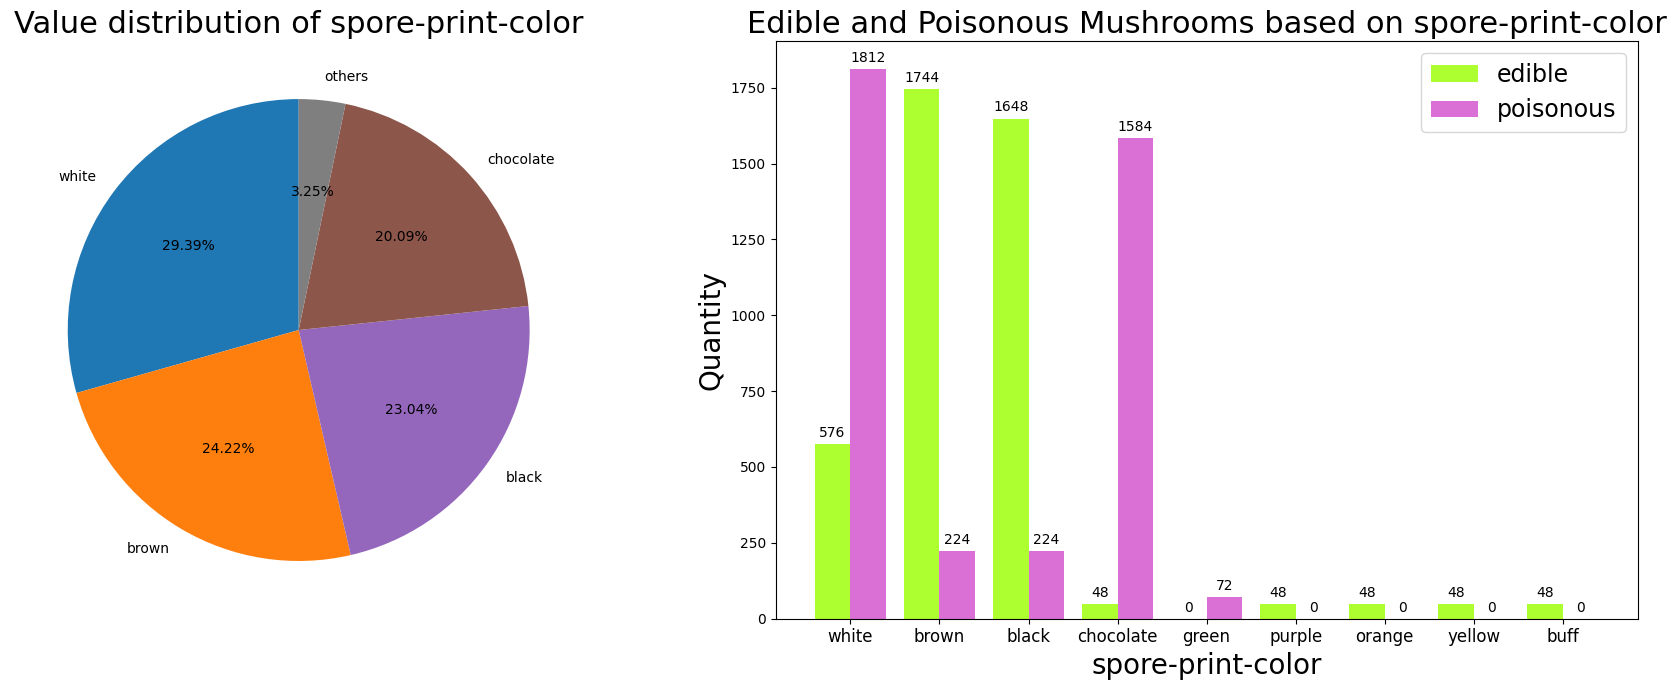

white: 29.39%
brown: 24.22%
black: 23.04%
chocolate: 20.09%
green: 0.89%
purple: 0.59%
orange: 0.59%
yellow: 0.59%
buff: 0.59%


In [33]:
plot_combined(df_copy,'spore-print-color')

La feature "spore-print-color" sembra avere un alto contenuto informativo per l'attributo di classe, non in modo estremo come "odor", ma comunque si può supporre che la correlazione tra le due non sia trascurabile.

#### population

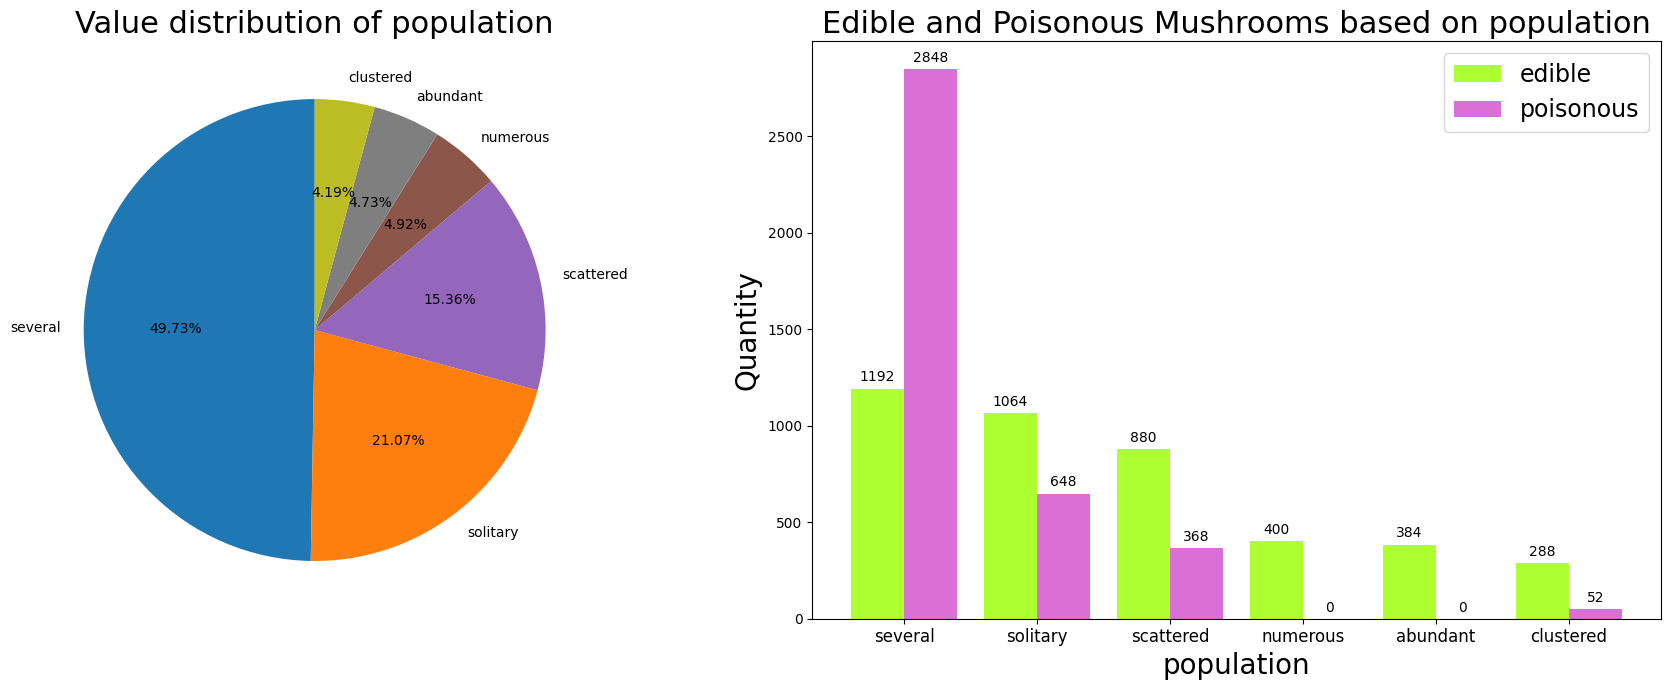

several: 49.73%
solitary: 21.07%
scattered: 15.36%
numerous: 4.92%
abundant: 4.73%
clustered: 4.19%


In [34]:
plot_combined(df_copy, 'population')

#### habitat

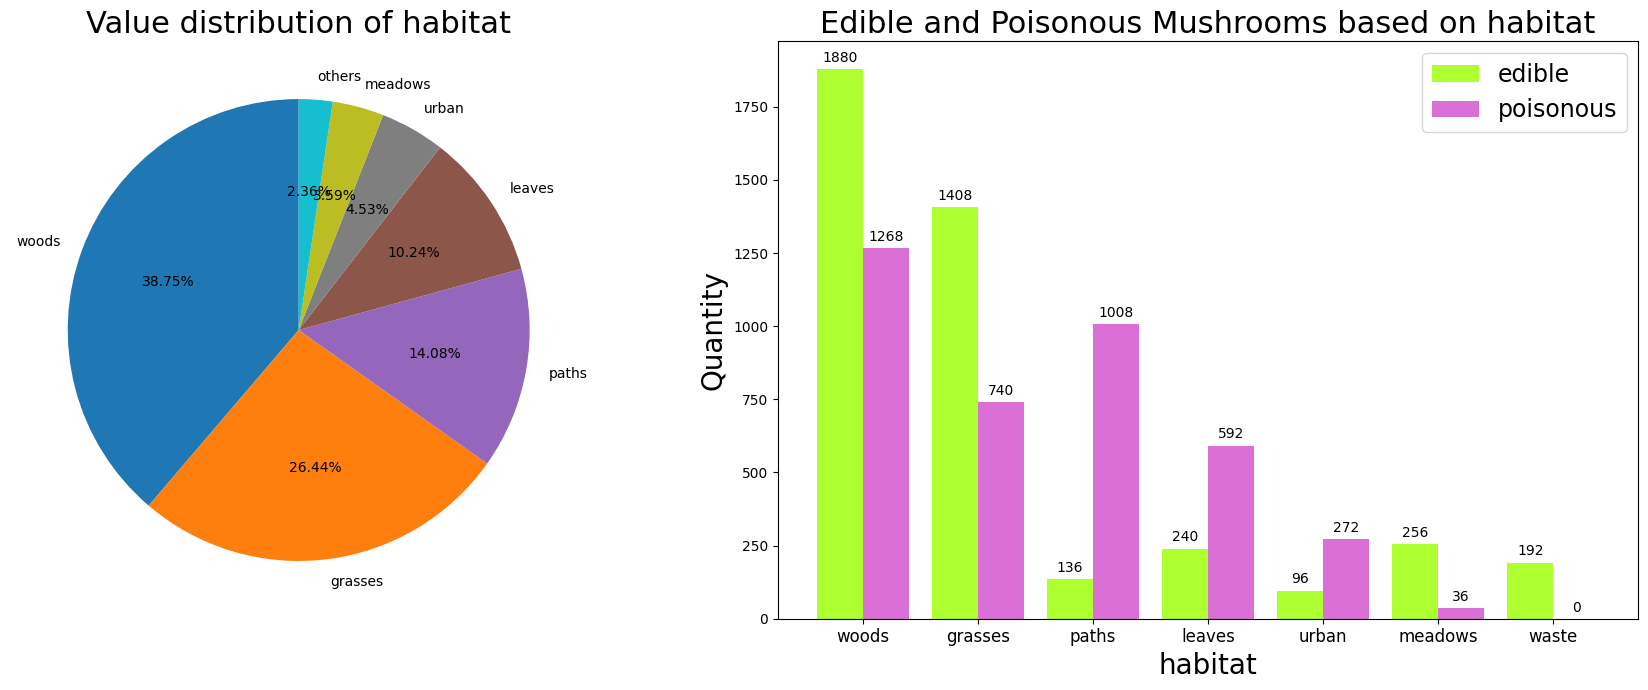

woods: 38.75%
grasses: 26.44%
paths: 14.08%
leaves: 10.24%
urban: 4.53%
meadows: 3.59%
waste: 2.36%


In [35]:
plot_combined(df_copy,'habitat')

### Conclusioni esplorazione dei dati

L'analisi grafica delle distribuzioni e la comparazione con la variabile target ha consentito la formulazione di ipotesi circa la correlazione tra le feature e l'attributo target e ha permesso di eliminare un attributo che presentava un unico valore per tutte le istanze.

In particolare nella fase di analisi di correlazione che verrà effettuata ci si aspetta una correlazione non indifferente tra la variabile target e le seguenti feature:
* "odor"
* "spore-print-color"
* "stalk-surface-above-ring"
* "gill-color"


# Data Transformation

Il dataset, come detto prima,  è composto esclusivamente da variabili categoriali.  \\
Una possibile soluzione sarebbe quella di utilizzare la codifica One Hot Encoding ma ciò comporterebbe un aumento notevole della dimensione del dataset raggiungendo un numero di colonne superiore a 100. \\
Si decide quindi di utilizzare un LabelEncoder per ogni colonna, quindi ogni categoria viene codificata con un intero.

In [36]:
from sklearn.preprocessing import LabelEncoder

df_1 = df.copy()

Encoder = LabelEncoder()

for col in df_1.columns:
  df_1[col] = Encoder.fit_transform(df_1[col])

df_1.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


La classe che prima aveva valori:
* *e* per edible (commestibile);
* *p* per poisonous (velenoso);

A seguito della codifica assume valori:
* $0$ per edible (commestibile);
* $1$ per poisonous (velenoso);

# Analisi della correlazione

Per effettuare un'analisi di correlazione tra le variabili, visto che sono tutte categoriali, si utilizza la V di Cramer: una misura per valutare l'associazione tra due variabili categoriali. \\
Essa è specificatamente progettata per lavorare con variabili categoriali a differenza del coefficiente di Pearson (correlazione lineare).  \\
La V di Cramer si basa sulla statistica $\chi^2$ ed è calcolata come segue: \\
\begin{equation} V = \sqrt{\frac{\chi^2 / N}{ min(k-1, r-1)}}\end{equation}


*   $\chi^2$ è il valore della statistica chi quadrato ottenuto dalla tabella di contigenza (matrice in cui ogni cella rappresenta il conteggio delle osservazioni che rientrano nelle categorie corrispondenti alle due variabili). Essa si basa sul confronto tra le frequenze osservate (nella tabella di contigenza) e le frequenze attese (se non ci fosse alcuna associazione). \\
Le frequenze attese per ogni cella si calcolano come $E_{ij} = \frac{R_i \cdot C_j}{N}$ dove $R_i$ rappresenta il totale della della riga *i* e $C_j$ rappresenta il totale della colonna *j*. \\
Il valore di $\chi^2$ si calcola come segue: $\chi^2 = \sum \frac{(O_{ij}-E_{ij})^2}{E_{ij}}$ dove $O_{ij}$ è la frequenza osservata per la cella nella riga *i* e nella colonna *j* e $E_{ij}$ è la frequenza attesa per la cella nella riga *i* e nella colonna *j*.
*   $N$ è il numero totale di osservazioni
*  $k$ è il numero di categorie della prima variabili (numero di colonne della matrice di contingenza).
*$r$ è il numero di categorie della seconda variabile (numero di righe della matrice di contingenza). <br>

La V di di Cramer assume valori compresi nell'intervallo $[0,1]$ dove:
* $0$ indica nessuna associazione tra le variabili.
* $1$ indica una associazione perfetta tra le variabili.

In [37]:
from scipy.stats import chi2_contingency

def cramers_V(var1, var2):
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None))
  stat = chi2_contingency(crosstab)[0] #chi quadrato test
  obs = np.sum(crosstab) #numero osservazioni
  mini = min(crosstab.shape)-1 #minimo tra numero righe e numero colonne -1
  return np.sqrt(stat/(obs*mini))

In [38]:
def plot_cramer(dataframe):
    rows = []
    for var1 in dataframe:
        col = []
        for var2 in dataframe:
            cramers = cramers_V(dataframe[var1], dataframe[var2])  # Valore della Cramer's V
            col.append(round(cramers, 2))  # Mantiene il valore arrotondato di Cramer's V
        rows.append(col)
    cramers_results = np.array(rows)
    cramers_df = pd.DataFrame(cramers_results, columns=dataframe.columns, index=dataframe.columns)
    fig, ax = plt.subplots(figsize=(12, 6))
    mask = np.zeros_like(cramers_df)  # per nascondere la parte della matrice
    mask[np.triu_indices_from(mask)] = True  # indice triang sup
    sns.heatmap(cramers_df, annot=True, mask=mask, cmap='coolwarm', vmin=0, vmax=1)
    plt.title('Categorical Variables Correlations Heatmap', fontsize=20,  pad=15)
    #plt.title('Categorical Variables Correlations Heatmap', fontsize=20, fontweight='bold', fontfamily='serif',  pad=15)
    plt.show()

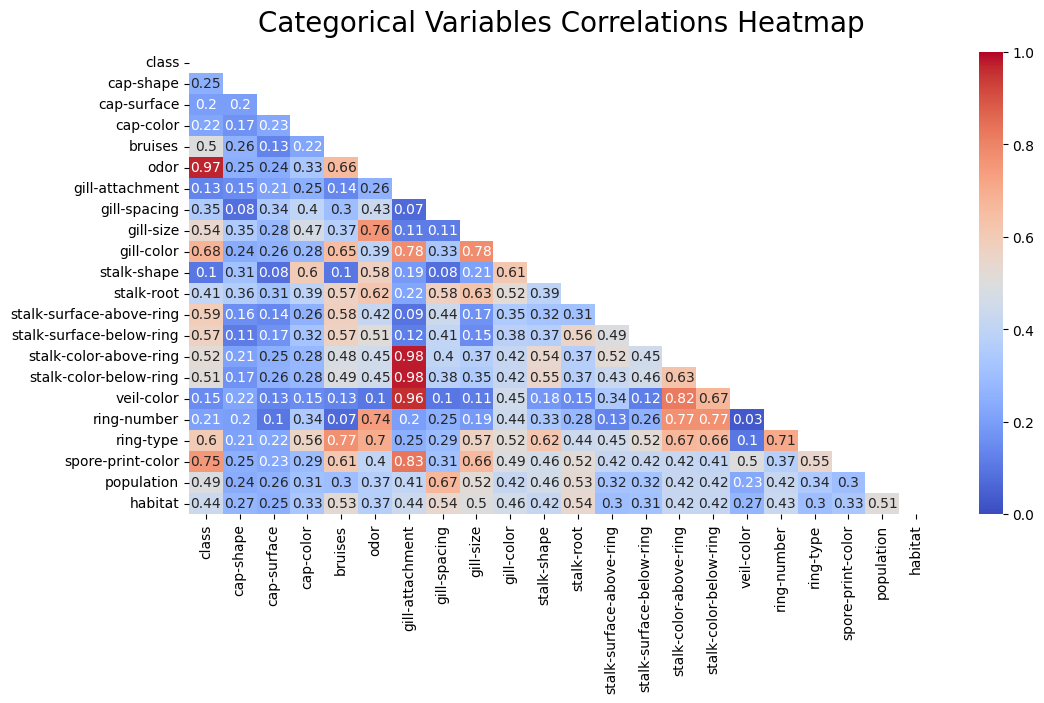

In [39]:
plot_cramer(df_1)

Dall'analisi dei valori della V di Cramer si notano diversi valori molto elevati che indicano un' elevata associazione:
* odor e variabile target.
* spore-print-color e variabile target.
* gill-attachment con stalk-color-above-ring, stalk-color-below-ring, veil-color.
* stalk-color-above-ring con ring-numer, veil-color e ring-type.
* gill-color con la variabile target, bruises, gill-attachment e gill-size.

Si decide quindi di non considerare le feature: "odor", "spore-print-color", "gill-attachment", "stalk-color-above-ring", "stalk-color-below-ring", "gill-color", "ring-type". <br>

Una elevata associazione con la variabile target potrebbe far sì che i modelli basino la predizione sull'elevato contenuto informativo di quella feature.


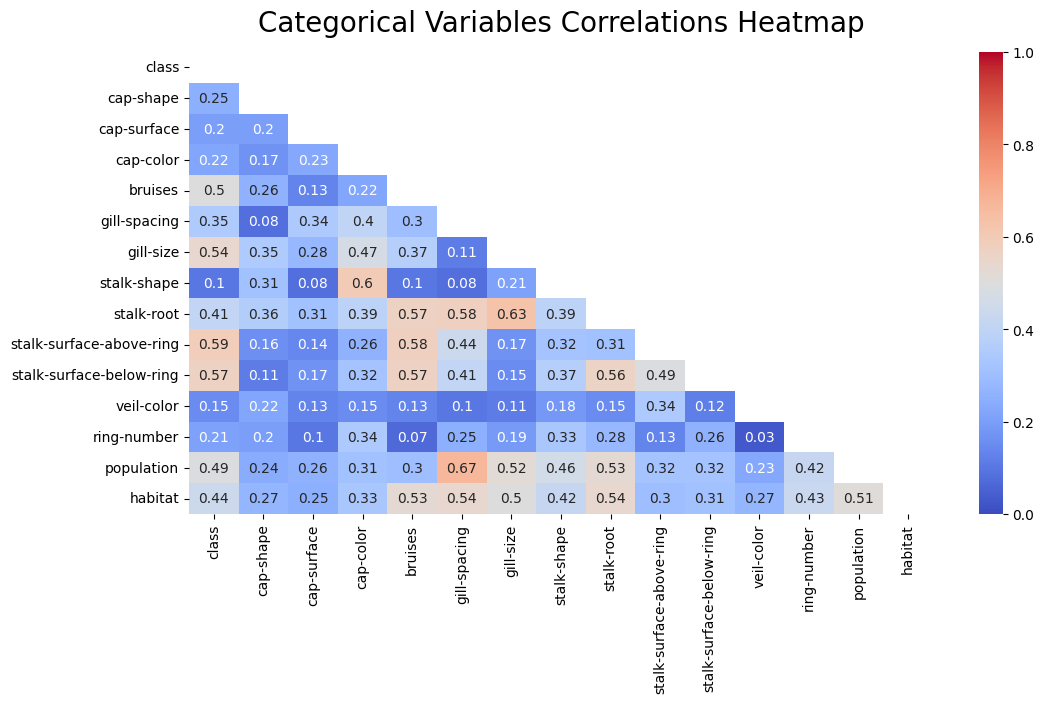

In [40]:
df_clean = df_1.drop(["odor", "spore-print-color", "gill-attachment", "stalk-color-above-ring", "stalk-color-below-ring", "gill-color", "ring-type"], axis = 1)
plot_cramer(df_clean)

Dall'analisi della V di Cramer di quest'ultima versione dei dati, si decide di non considerare nemmeno le feature "stalk-surface-above-ring" e "stalk-surface-below-ring" per via della loro elevata associazione con la variabile target che si pensa possa dare troppe informazioni ai modelli di classificazione. <br>
Inoltre non si considera nemmeno la variabile "gill-spacing".

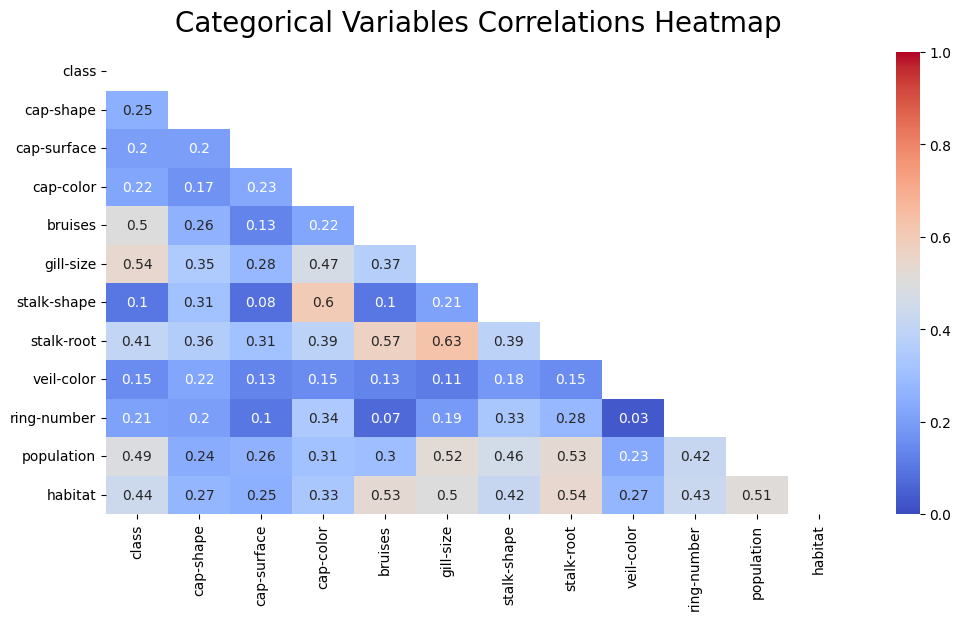

In [41]:
df_fin = df_clean.drop(["stalk-surface-above-ring", "stalk-surface-below-ring", "gill-spacing"], axis = 1)
plot_cramer(df_fin)

Sono state eliminate le variabili con un'elevata associazione in modo da ridurre la dimensionalità del dataset e soprattutto per non utilizzare variabili che hanno un elevato contenuto informativo che potrebbe rendere la vita fin troppo semplice ai modelli.

# Divisione del dataset

In [43]:
from sklearn.model_selection import train_test_split

X = df_fin.drop(['class'],axis=1)
y = df_fin['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

Effettuata la divisione in test set e training set si effettua un controllo circa la distribuzione della variabile target. \\
Si desidera che almeno la distribuzione della variabile di classe sia uguale nelle due divisioni in modo da non introdurre bias nei modelli.

In [44]:
colors = [ '#ADFF2F', '#DA70D6']
colors_pie = ['#ADFF2F', '#DA70D6']

def plot_class(dataframe):
  fig, axes = plt.subplots(1, 2, figsize=(10, 5))

  # Create a count plot
  sns.countplot(data= dataframe, x ='class', hue='class', palette=colors, ax=axes[0], legend=False)
  axes[0].set_title('Count of class')
  axes[0].set_xlabel('class')
  axes[0].set_ylabel('Count')

  # Create a pie plot
  value_counts = dataframe['class'].value_counts()
  axes[1].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90, colors=colors_pie)
  axes[1].set_title('Distribution of Class')

  plt.tight_layout()
  plt.show()

### Distribuzione variabile target nel **dataset originario**

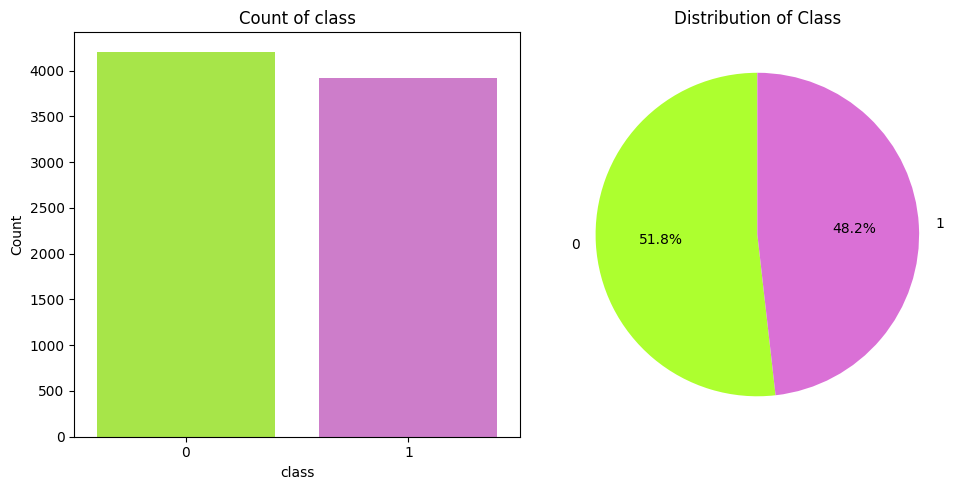

In [45]:
plot_class(df_fin)

### Distribuzione variabile target nel **training set**

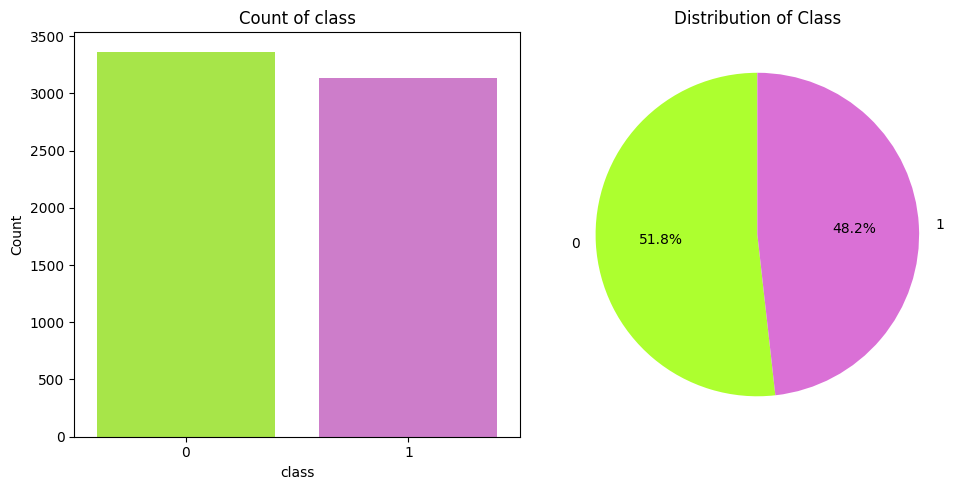

In [46]:
plot_class(pd.DataFrame(y_train))

### Distribuzione variabile target nel **test set**

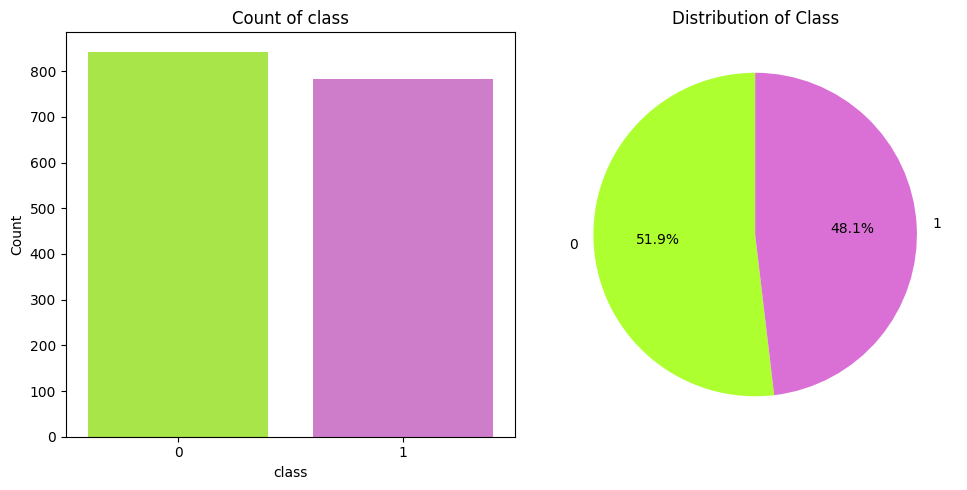

In [47]:
plot_class(pd.DataFrame(y_test))

Si nota che la distribuzione della variabile di classe è uguale quindi si è in una situazione ideale.


# Confronto Classificatori

La classificazione ha lo scopo di classificare un fungo come commestibile (classe 0) oppure velenoso (classe 1).

Una considerazione che bisogna fare a monte dell'addestramento dei modelli è che considerando la classe 0 (fungo commestibile) come classe positiva, bisogna tutelarsi maggiormente rispetto all'errore del primo tipo in quanto sarebbe molto pericoloso classificare un fungo velenoso come commestibile.

Un'altra considerazione fondamentale per la valutazione dei modelli è che nella variabile di classe non vi è sbilanciamento, quindi le metriche sotto definite sono affidabili:
- Precision: misura la frazione di record effettivamente positivi tra tutti quelli che sono stati classificati come tali.
- Recall: misura la frazione di record effettivamente positivi classificati come tali rispetto a tutti gli oggetti effettivamente positivi.
- F-Measure: media armonica di Precision e Recall.
- Accuracy: frazione record classificati correttamente.

La funzione sotto definita implementa la cross-validation se la variabile  "cross_val" è vera, altrimenti effettua la predizione sull'insieme di dati passato in "X" calcolando gli score passati in "scoring_funs". \\
Restituisce i risultati e inoltre li salva in un DataFrame differenziando se lo score è stato ottenuto sul training set oppure sul test set.

In [48]:
from sklearn.model_selection import cross_val_score
import sklearn.metrics
import pandas as pd

results = pd.DataFrame()

def compute_performance(estimator, estimator_name,  X, y, scoring_funs, cross_val, type):
  global results
  dict = {}
  dict['classifier'] = estimator_name
  if not cross_val: #si misurano le performance sul test set
    y_pred = estimator.predict(X) #calcolo etichette
  for f in scoring_funs:
    if cross_val == True: #cross validation
      score = cross_val_score(estimator, X, y, cv = 10, scoring=f).mean()
      name = f #nome misura di performance
      dict[name] = score
    else: #no cross validation -> performance sul test set
      name = f
      _f = f+"_score"
      function = getattr(sklearn.metrics, _f) #prendere la funzione dal nome
      score = function(y_pred, y)
      dict[name] = score

  dict['Type'] = type
  results = results._append(dict, ignore_index = True)
  return dict


## Logistic Regression

È un algoritmo di apprendimento supervisionato utilizzato per classificare dati in categorie. \\
Utilizza la funzione logistica per modellare la probabilità che un oggetto sia di una specifica classe.

La funzione logistica è $\sigma(z)= \frac{1}{1 + e^{-z}}$

dove $z= \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \ldots + \theta_n x_n $ è la combinazione lineare dei pesi dei coefficienti $θ$ e delle feature.

### Modello di Default


In [49]:
from sklearn.linear_model import LogisticRegression
logreg_clf = LogisticRegression(max_iter=100)

Comportamento sul training set:

In [50]:
compute_performance(logreg_clf, 'LogReg', X_train, y_train, ['accuracy', 'precision', 'recall', 'f1'], True, 'train')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

{'classifier': 'LogReg',
 'accuracy': 0.9278338271897594,
 'precision': 0.9510913146424793,
 'recall': 0.8966107730815409,
 'f1': 0.9229657921048249,
 'Type': 'train'}

Si nota che con i parametri di default non arriva a convergenza quindi si decide di aumentare il numero massimo di iterazioni. \\

Comportamento sul test set:

In [51]:
logreg_clf.fit(X_train, y_train)
compute_performance(logreg_clf, "LogReg", X_test, y_test, ['accuracy', 'precision', 'recall', 'f1'], False, 'test')

{'classifier': 'LogReg',
 'accuracy': 0.9144615384615384,
 'precision': 0.8823529411764706,
 'recall': 0.9362279511533242,
 'f1': 0.9084924292297564,
 'Type': 'test'}


In generale si cerca di ottimizzare il modello utilizzando una GridSearch.

### Modello con Grid Search

In [52]:
from sklearn.model_selection import GridSearchCV
logreg_clf = LogisticRegression()

param_grid = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'newton-cholesky'],
    'max_iter' : [300, 500, 700, 1000]
}

grid_search = GridSearchCV(estimator=logreg_clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Migliori parametri trovati: ", best_params)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Migliori parametri trovati:  {'C': 10, 'max_iter': 300, 'penalty': 'l2', 'solver': 'liblinear'}


In [53]:
logreg_clf_best = grid_search.best_estimator_

Comportamento modello ottimizzato sul training set

In [54]:
compute_performance(logreg_clf_best, "GridLogReg", X_train , y_train, ['accuracy', 'precision', 'recall', 'f1'], True, "train")

{'classifier': 'GridLogReg',
 'accuracy': 0.9278338271897594,
 'precision': 0.9510913146424793,
 'recall': 0.8966107730815409,
 'f1': 0.9229657921048249,
 'Type': 'train'}

Comportamento modello ottimizzato sul test set

In [55]:
compute_performance(logreg_clf_best, "GridLogReg", X_test, y_test, ['accuracy', 'precision', 'recall', 'f1'], False, "test" )

{'classifier': 'GridLogReg',
 'accuracy': 0.9144615384615384,
 'precision': 0.8823529411764706,
 'recall': 0.9362279511533242,
 'f1': 0.9084924292297564,
 'Type': 'test'}

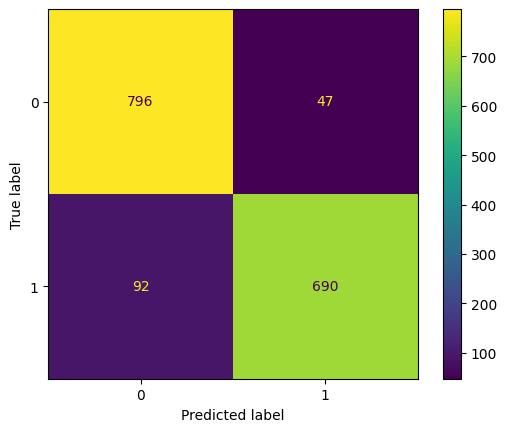

In [56]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_test_pred = logreg_clf_best.predict(X_test)
ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_pred)).plot()

Il modello anche prima del tentativo di ottimizzazione tramite la grid search mostrava dei risultati molto buoni. \\
Nonostante la grid search, però, non si è ottenuto un miglioramento su di esso.

Si nota una differenza di 0.6 tra il valore di precision sul training set e il valore di precision sul test set, però i valori di accuracy e recall rimangono in linea quindi comunque si pensa non vi sia overfitting e che il modello si adatti bene ai dati mantenendo una buona capacità di generalizzazione.

Idealmente, come detto all'inizio, si vorrebbe un numero di falsi positivi minimo in modo da tutelarsi rispetto all'erroe del primo tipo, ma in generale il modello si comporta in maniera ottimale.

## SGD (Stochastic Gradient Descent)

È un modello di apprendimento supervisionato, in particolare è un modello lineare regolarizzato che si basa sulla discesa stocastica del gradiente.

### Modello di Default
Di seguito il training del modello default.

I parametri principali sono:
- loss; funzione di loss usata.
- penalty = norma l2; termine di regolarizzazione.
- apha = 0.0001; costante moltiplicativa per il termine di regolarizzazione.
- max_iter = 1000; numero di passi massimo sul training set.
- tol = 1e-3; criterio di arresto.

In [57]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)

Comportamento sul training set (cross-validation):

In [58]:
compute_performance(sgd_clf, "SGD", X_train, y_train, ['accuracy', 'precision', 'recall', 'f1'], True, 'train')

{'classifier': 'SGD',
 'accuracy': 0.9099874362925211,
 'precision': 0.9348518110373348,
 'recall': 0.8765175718849841,
 'f1': 0.9030040580847564,
 'Type': 'train'}

Comportamento sul test set:

In [59]:
sgd_clf.fit(X_train, y_train)
compute_performance(sgd_clf, 'SGD', X_test, y_test, ['accuracy', 'precision', 'recall', 'f1'], False, 'test')

{'classifier': 'SGD',
 'accuracy': 0.9150769230769231,
 'precision': 0.9040920716112532,
 'recall': 0.9181818181818182,
 'f1': 0.9110824742268042,
 'Type': 'test'}

Il modello di default ha un ottimo comportamento sia sul training set che sul test set. \\
Vi è un ottimo accordo tra i due risultati il che è indicatore di assenza di overfitting. \\

Si prova a ottimizzare il modello effettuando una grid search.

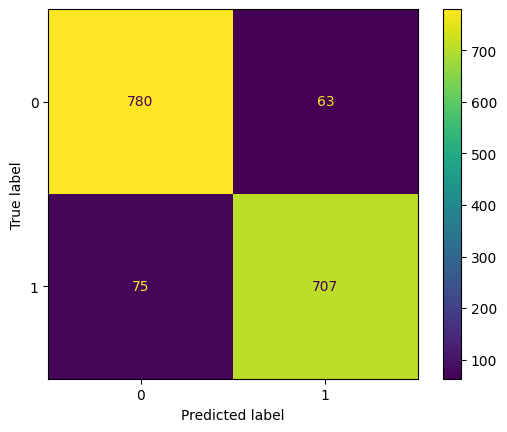

In [60]:
y_test_pred = sgd_clf.predict(X_test)
ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_pred)).plot()

### Modello con Grid Search

In [61]:
from sklearn.model_selection import GridSearchCV
sgd_clf = SGDClassifier(random_state=42)

param_grid = {
    'penalty': [None, 'l2', 'l1', 'elasticnet'],
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
    'max_iter': [1000, 1500, 2000, 3000],
}

grid_search = GridSearchCV(estimator=sgd_clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Migliori parametri trovati: ", best_params)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Migliori parametri trovati:  {'alpha': 0.001, 'max_iter': 1000, 'penalty': None}


In [62]:
sgd_clf_best = grid_search.best_estimator_

Comportamento modello ottimizzato sul training set

In [64]:
compute_performance(sgd_clf_best, "GridSGD", X_train, y_train, ['accuracy', 'precision', 'recall', 'f1'], True, "train")

{'classifier': 'GridSGD',
 'accuracy': 0.9261429418039586,
 'precision': 0.947386331200241,
 'recall': 0.8972426283551413,
 'f1': 0.9213558387281688,
 'Type': 'train'}

Comportamento modello ottimizzato sul test set.

In [65]:
compute_performance(sgd_clf_best, "GridSGD", X_test, y_test, ['accuracy', 'precision', 'recall', 'f1'], False, "test")

{'classifier': 'GridSGD',
 'accuracy': 0.9009230769230769,
 'precision': 0.9028132992327366,
 'recall': 0.8925410872313527,
 'f1': 0.8976478067387158,
 'Type': 'test'}

Anche in questo caso il modello ha un ottimo comportamento sia sul training set che sul test set (seppur un leggero peggioramento in termini di precision e accuracy).

## SVM (Support Vector Machine)
Le Support Vector Machine costituiscono modelli di apprendimento supervisionato. \\
In particolare, la Support Vector Classification sfrutta una rappresentazione degli esempi come punti nello spazio cercando di costruire un iperpiano di separazione.

### Modello di Default

Di seguito è riportato il modello di default. \\
I principali parametri (con il valore di default) sono:
- C = 1.0; parametro di regolarizzazione, valori elevati danno maggior peso alla violazione degli errori, valori piccoli danno maggior peso alla capacità di generalizzazione.
- kernel = rbf; tipo di kernel utilizzato.
- degree; grado del kernel se è polinomiale.

In [66]:
from sklearn.svm import SVC

svc_clf = SVC(random_state = 42)

Comportamento sul training set:

In [67]:
compute_performance(svc_clf, "SVC", X_train, y_train, ['accuracy', 'precision', 'recall', 'f1'], True, "train")

{'classifier': 'SVC',
 'accuracy': 0.9689185729524713,
 'precision': 0.9743316951279093,
 'recall': 0.9610600109887875,
 'f1': 0.9675425129071039,
 'Type': 'train'}

Comportamento sul test set:

In [68]:
svc_clf.fit(X_train, y_train)
compute_performance(svc_clf, "SVC", X_test, y_test, ['accuracy', 'precision', 'recall', 'f1'], False, "test")

{'classifier': 'SVC',
 'accuracy': 0.9692307692307692,
 'precision': 0.9641943734015346,
 'recall': 0.9716494845360825,
 'f1': 0.9679075738125802,
 'Type': 'test'}

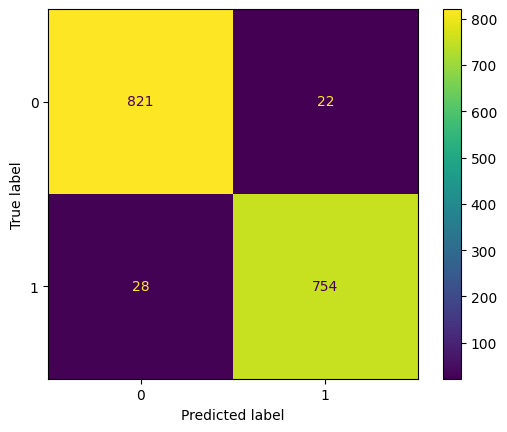

In [69]:
y_test_pred = svc_clf.predict(X_test)
ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_pred)).plot()

I risultati ottenuti sono eccellenti: il modello ha un comportamento eccelso sia sul training set che sul test set.

Si ha un valore di precision eccellente e quindi si è molto robusti sull'errore del primo tipo (da cui ci si vuole tutelare maggiormente);

## Naive Bayes

Il dataset in esame contiene solo variabili categoriali quindi si sfrutta
 un classificatore Naive Bayes che Scikitlearn mette a disposizione ottimizzato per le feature categoriali.

### Modello di Default

In [70]:
from sklearn.naive_bayes import CategoricalNB

cnb_clf = CategoricalNB()

Comportamento sul training set:


In [71]:
compute_performance(cnb_clf, "Naive Bayes", X_train, y_train, ['accuracy', 'precision', 'recall', 'f1'], True, "train")

{'classifier': 'Naive Bayes',
 'accuracy': 0.865210145786417,
 'precision': 0.9213614219788253,
 'recall': 0.788134144604302,
 'f1': 0.8490931043502133,
 'Type': 'train'}

Comportamento sul test set:

In [72]:
cnb_clf.fit(X_train, y_train)
compute_performance(cnb_clf, "Naive Bayes", X_test, y_test, ['accuracy', 'precision', 'recall', 'f1'], False, "test")

{'classifier': 'Naive Bayes',
 'accuracy': 0.8529230769230769,
 'precision': 0.782608695652174,
 'recall': 0.8986784140969163,
 'f1': 0.836637047163363,
 'Type': 'test'}

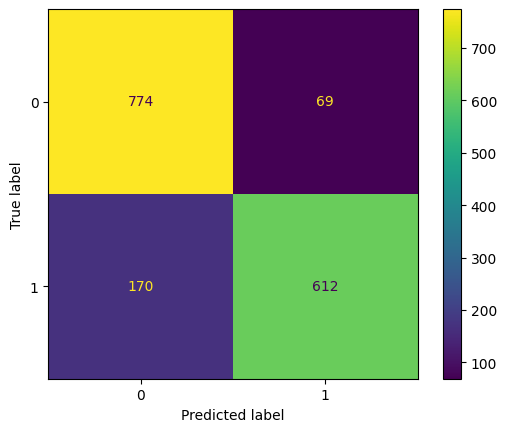

In [73]:
y_test_pred = cnb_clf.predict(X_test)
ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_pred)).plot()

Tra i modelli analizzati fino ad ora per cui il problema è evidente sia facile, il classificatore Naive Bayes è il peggiore.

In particolare si nota una elevata differenza tra la precision ottenuta sul training set e la precision ottenuta sul test set. \\
Sul test set si ha un valore scarso che si può notare anche dal numero di falsi positivi nella confusion matrix, il che rende il modello non robusto rispetto all'errore del primo tipo, rispetto al quale ci si vuole tutelare.

Sul test set, però, vi è un aumento della recall e di conseguenza il valore del F1-score rimane invariato.

Vista l'assenza di iper-parametri di rilevanza per il modello non si effettua la Grid-Search.

## Decision Tree

Fa parte dei metodi di apprendimento supervisionato il cui obiettivo è creare un modello che preveda il valore di una variabile target apprendendo semplici regole decisionali dedotte dalle caratteristiche dei dati rappresentate tramite un albero.

### Modello di Default

I parametri principali (con valori default) sono:
- criterion = "gini"; è la misura della qualità dello split.
- max_depth = None; massima profondità dell'albero.
- min_samples_split = 2; indica il minimo numero di elementi per effettuare lo split di un nodo interno.
- min_samples_leaf = 1; numero minimo di elementi in un nodo foglia.
- max_leaf_nodes = None; numero massimo di nodi foglia.

In [74]:
from sklearn.tree import DecisionTreeClassifier

DTree_clf = DecisionTreeClassifier(random_state = 42)

Comportamento sul training set:

In [75]:
compute_performance(DTree_clf, "DecisionTree", X_train, y_train, ['accuracy', 'precision', 'recall', 'f1'], True, "train")

{'classifier': 'DecisionTree',
 'accuracy': 1.0,
 'precision': 1.0,
 'recall': 1.0,
 'f1': 1.0,
 'Type': 'train'}

Comportamento sul test set:

In [76]:
DTree_clf.fit(X_train, y_train)
compute_performance(DTree_clf, "DecisionTree", X_test, y_test, ['accuracy', 'precision', 'recall', 'f1'], False, "test")

{'classifier': 'DecisionTree',
 'accuracy': 1.0,
 'precision': 1.0,
 'recall': 1.0,
 'f1': 1.0,
 'Type': 'test'}

Con i parametri di default è evidente che il modello impara a memoria i dati causando overfitting. <br>
Un modello del genere è inutile in quanto non ha nessuna capacità di generalizzare. <br>
Si prova quindi a ridurre la complessità del modello inizialmente solo limitando il numero di nodi foglia.

In [77]:
from sklearn.tree import DecisionTreeClassifier

DTree_clf = DecisionTreeClassifier(max_leaf_nodes = 10, random_state = 42)
compute_performance(DTree_clf, "DecisionTree10Leaf", X_train, y_train, ['accuracy', 'precision', 'recall', 'f1'], True, "train")

{'classifier': 'DecisionTree10Leaf',
 'accuracy': 0.9519938366718028,
 'precision': 0.9568466971097168,
 'recall': 0.9432011965568465,
 'f1': 0.9498547576388475,
 'Type': 'train'}

Si ottengono valori molto elevati il che dimostra che il problema che si sta affrontando è molto semplice; il modello si adatta molto bene ai dati del training set nonostante la complessità sia stata ridotta drasticamente. \\
Si analizza il comportamento anche sul test set

In [78]:
DTree_clf.fit(X_train, y_train)
compute_performance(DTree_clf, "DecisionTree10Leaf", X_test, y_test, ['accuracy', 'precision', 'recall', 'f1'], False, "test")

{'classifier': 'DecisionTree10Leaf',
 'accuracy': 0.9513846153846154,
 'precision': 0.9475703324808185,
 'recall': 0.9512195121951219,
 'f1': 0.9493914157591288,
 'Type': 'test'}

Vi è accordo tra il comportamento sul training set e il comportamento sul test set ed entrambi sono ottimi: robusti e precisi. \\
Ciò si può apprezzare meglio attraverso una rapida analisi della confusion matrix

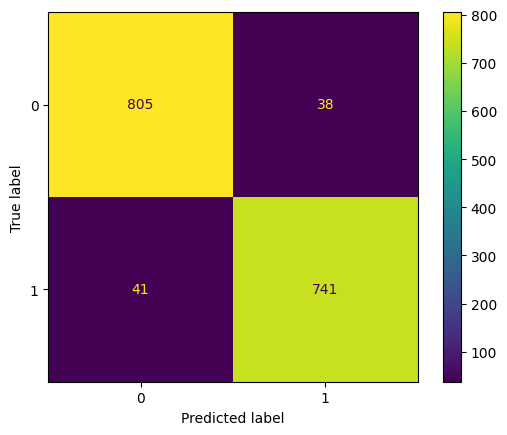

In [79]:
y_test_pred = DTree_clf.predict(X_test)
ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_pred)).plot()

La quale mostra che il modello sul test set ha un ridotto numero di falsi positivi e falsi negativi.

Si decide comunque di effettuare una grid search sempre con un occhio alla complessità del modello.

### Modello con Grid Search

In [80]:
from sklearn.model_selection import GridSearchCV

DTree_clf = DecisionTreeClassifier()

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_leaf_nodes': [6, 8, 10, 12],
    'max_depth': [5, 8, 10],
    'min_samples_leaf': [1, 5, 10],
    'min_samples_split': [2, 5, 10],
}

grid_search = GridSearchCV(estimator=DTree_clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X, y)

best_params = grid_search.best_params_

print("Migliori parametri:", best_params)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Migliori parametri: {'criterion': 'entropy', 'max_depth': 8, 'max_leaf_nodes': 12, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [81]:
DTree_clf_best = grid_search.best_estimator_

Comportamento sul training set

In [82]:
compute_performance(DTree_clf_best, "GridDecisionTree", X_train, y_train, ['accuracy', 'precision', 'recall', 'f1'], True, "train")

{'classifier': 'GridDecisionTree',
 'accuracy': 0.9610714709019794,
 'precision': 0.959100929177574,
 'recall': 0.9604251032742518,
 'f1': 0.9595929532961307,
 'Type': 'train'}

Comportamento sul test set

In [83]:
compute_performance(DTree_clf_best, "GridDecisionTree", X_test, y_test, ['accuracy', 'precision', 'recall', 'f1'], False, "test")

{'classifier': 'GridDecisionTree',
 'accuracy': 0.963076923076923,
 'precision': 0.9718670076726342,
 'recall': 0.9523809523809523,
 'f1': 0.9620253164556961,
 'Type': 'test'}

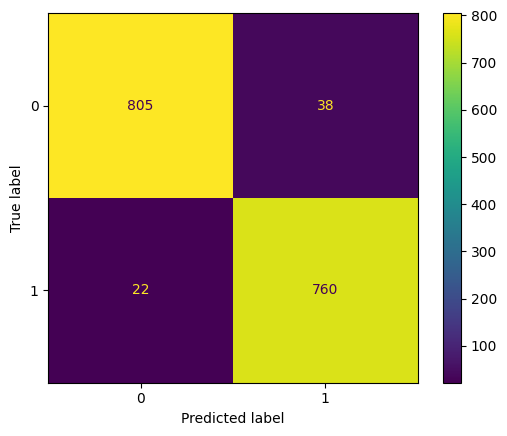

In [84]:
y_test_pred = DTree_clf_best.predict(X_test)
ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_pred)).plot()

Pur portando la complessità del modello ai minimi termini limitando notevolmente il numero di nodi foglia e la profondità dell'albero stesso, si ottiene un modello molto potente.
Unendo tali considerazioni al fatto che anche i precedenti modelli mostravano dei comportamenti eccellenti senza particolari sforzi, si può sicuramente affermare che la difficoltà del problema è molto scarsa.

## KNN

È un algoritmo, del tipo supervisionato, utilizzato nel riconoscimento di pattern per la classificazione di oggetti basandosi sulle caratteristiche degli oggetti vicini a quello considerato: cioè non apprende dal training set. L'algoritmo troverà i K oggetti più vicini alla nuova istanza dai dati di addestramento.

### Modello di Default

I due principali parametri per l'algoritmo KNN sono:
- n_neighbors = 5; il numero di vicini.
- weights = 'uniform'; indica il tipo di peso usato in fase di predizione. Si potrebbe far sì che punti più vicini abbiano maggiore influenza sulla classe del punto da classificare usando 'distance' come valore.

In [85]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()

Comportamento sul training set

In [86]:
compute_performance(knn_clf, "KNN", X_train, y_train, ['accuracy', 'precision', 'recall', 'f1'], True, "train")

{'classifier': 'KNN',
 'accuracy': 0.9969223657698233,
 'precision': 0.9955594974957028,
 'recall': 0.998086119533587,
 'f1': 0.9968142457024314,
 'Type': 'train'}

Comportamento sul test set

In [87]:
knn_clf.fit(X_train, y_train)
compute_performance(knn_clf, "KNN", X_test, y_test, ['accuracy', 'precision', 'recall', 'f1'], False, "test")

{'classifier': 'KNN',
 'accuracy': 0.9950769230769231,
 'precision': 0.9974424552429667,
 'recall': 0.9923664122137404,
 'f1': 0.9948979591836734,
 'Type': 'test'}

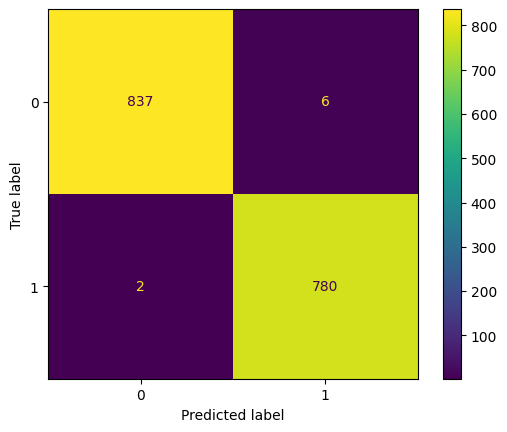

In [88]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_test_pred = knn_clf.predict(X_test)

ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_pred)).plot()

I risultati forniti dal modello di default sono un chiaro segno di overfitting.

Per ridurre tale problematica si cerca di ridurre la complessità del modello andando ad aumentare il numero di vicini da considerare che di default è pari a 5 (molto basso). \\
Ovviamente non si cambia il peso dell'influenza della classe dei vicini perché così facendo si otterrebbero gli stessi risultati.


### Modello con complessità ridotta

In [89]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()

param_grid = {
    'n_neighbors': range(50, 60),
}

grid_search = GridSearchCV(estimator=knn_clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

print("Migliori parametri:", best_params)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Migliori parametri: {'n_neighbors': 53}


In [90]:
knn_clf_best = grid_search.best_estimator_

Comportamento sul training set

In [91]:
compute_performance(knn_clf_best, "GridKNN", X_train, y_train, ['accuracy', 'precision', 'recall', 'f1'], True, "train")

{'classifier': 'GridKNN',
 'accuracy': 0.9289112243688514,
 'precision': 0.9343562723212202,
 'recall': 0.9173500742760627,
 'f1': 0.9256836356365385,
 'Type': 'train'}

Comportamento sul test set

In [92]:
compute_performance(knn_clf_best, "GridKNN", X_test, y_test, ['accuracy', 'precision', 'recall', 'f1'], False, "test")

{'classifier': 'GridKNN',
 'accuracy': 0.9181538461538462,
 'precision': 0.9156010230179028,
 'recall': 0.9144316730523627,
 'f1': 0.9150159744408946,
 'Type': 'test'}

Aumentando il numero di vicini si riduce di molto la complessità del modello. Contestualmente all'aumento del numero di vicini si è deciso di non modificare il peso della classe di essi poiché se si fosse attribuito un peso maggiore ai vicini meno distanti allora sarebbe stato inutile l'aumento del numero di oggetti vicini. \\
I risultati ottenuti con la complessità ridotta sono soddisfacenti sia sul training set che sul test set, vi è accordo tra i due e quindi non si è in presenza di overfitting.

## Ensemble Classifiers

I classificatori ensemble aggregrano modelli diversi il che porta a predizioni accurate e generalizzabili.

Di seguito è riportato l'utilizzo di classificatori Ensemble. \\
Nello specifico verranno addestrati: RandomForest, Voting, Bagging e Boosting.

### Random Forest
Un RandomForestClassifier combina diversi alberi decisionali, ognuno dei quali viene addestrato su un sottoinsieme casuale dei dati di addestramento e con un sottoinsieme casuale delle caratteristiche (features). Questa tecnica è nota come bagging (bootstrap aggregating).

#### Modello di Default

In [93]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(random_state=42)

Comportamento sul training set

In [94]:
compute_performance(rnd_clf, "RandomForest", X_train, y_train, ['accuracy', 'precision', 'recall', 'f1'], True, "train")

{'classifier': 'RandomForest',
 'accuracy': 1.0,
 'precision': 1.0,
 'recall': 1.0,
 'f1': 1.0,
 'Type': 'train'}

Comportamento sul test set

In [95]:
rnd_clf.fit(X_train, y_train)
compute_performance(rnd_clf, "RandomForest", X_test, y_test, ['accuracy', 'precision', 'recall', 'f1'], False, "test")

{'classifier': 'RandomForest',
 'accuracy': 1.0,
 'precision': 1.0,
 'recall': 1.0,
 'f1': 1.0,
 'Type': 'test'}

Dai risultati è chiaro che il modello di default è troppo potente per il problema in analisi: il modello imparara a memoria i dati. \\
Il numero di default di stimatori utilizzati è 100, si cerca di ridurre la complessità del modello andando a ridurre drasticamente tale valore.

In [97]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(random_state=42, n_estimators = 10)

Comportamento sul training set

In [98]:
compute_performance(rnd_clf, "RandomForest10Trees", X_train, y_train, ['accuracy', 'precision', 'recall', 'f1'], True, "train")

{'classifier': 'RandomForest10Trees',
 'accuracy': 0.9996920706412231,
 'precision': 1.0,
 'recall': 0.9993620398445289,
 'f1': 0.9996805103668261,
 'Type': 'train'}

Comportamento sul test set

In [99]:
rnd_clf.fit(X_train, y_train)
compute_performance(rnd_clf, "RandomForest10Trees", X_test, y_test, ['accuracy', 'precision', 'recall', 'f1'], False, "test")

{'classifier': 'RandomForest10Trees',
 'accuracy': 1.0,
 'precision': 1.0,
 'recall': 1.0,
 'f1': 1.0,
 'Type': 'test'}

Si è ancora in presenza di overfitting quindi si decide di limitare ulteriormente la complessità del modello andando a imporre un numero massimo di nodi foglia ai Decision Tree.

In [100]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(random_state=42, n_estimators = 10, max_leaf_nodes = 10)

Comportamento sul training set

In [101]:
compute_performance(rnd_clf, "RandomForest10T10L", X_train, y_train, ['accuracy', 'precision', 'recall', 'f1'], True, "train")

{'classifier': 'RandomForest10T10L',
 'accuracy': 0.9544522934692428,
 'precision': 0.9711880441528074,
 'recall': 0.9332939907612788,
 'f1': 0.9517794552648731,
 'Type': 'train'}

Comportamento sul test set

In [102]:
rnd_clf.fit(X_train, y_train)
compute_performance(rnd_clf, "RandomForest10T10L", X_test, y_test, ['accuracy', 'precision', 'recall', 'f1'], False, "test")

{'classifier': 'RandomForest10T10L',
 'accuracy': 0.9483076923076923,
 'precision': 0.9245524296675192,
 'recall': 0.9665775401069518,
 'f1': 0.9450980392156862,
 'Type': 'test'}

Il modello con una complessità molto ridotta mostra risultati molto buoni seppur sul test set vi si una riduzione del valore di precision ma un aumento della recall. \\
Si effettua comunque una grid search per provare diverse combinazioni di parametri sempre mantenendo sotto controllo  la complessità del modello.

#### Modello con Grid Search

In [103]:
rnd_clf = RandomForestClassifier(random_state = 42)

param_grid = {
    'n_estimators': [2, 4, 6, 8, 10],
    'max_depth': [10, 12, 14],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_leaf_nodes' : [5, 8, 10]
}
grid_search = GridSearchCV(estimator=rnd_clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

print("Migliori parametri:", best_params)

Fitting 5 folds for each of 405 candidates, totalling 2025 fits
Migliori parametri: {'max_depth': 10, 'max_leaf_nodes': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 4}


In [104]:
rnd_clf_best = grid_search.best_estimator_

Comportamento sul training set

In [105]:
compute_performance(rnd_clf_best, "GridRandomForest", X_train, y_train, ['accuracy', 'precision', 'recall', 'f1'], True, "train")

{'classifier': 'GridRandomForest',
 'accuracy': 0.9623015289794952,
 'precision': 0.972073253729501,
 'recall': 0.949261309293665,
 'f1': 0.9604015117190311,
 'Type': 'train'}

Comportamento sul test set

In [106]:
compute_performance(rnd_clf_best, "GridRandomForest", X_test, y_test, ['accuracy', 'precision', 'recall', 'f1'], False, "test")

{'classifier': 'GridRandomForest',
 'accuracy': 0.9612307692307692,
 'precision': 0.948849104859335,
 'recall': 0.9699346405228758,
 'f1': 0.9592760180995474,
 'Type': 'test'}

Andando ad aggiungere ulteriori limitazioni per la complessità, in particolare su
* numero minimo di istanze per separare un nodo
* numero minimo di istanze per nodo foglia

si ottiene un modello che a livello di performance perde leggermente ma sicuramente ha una capacità maggiore di generalizzazione.

### Voting
Il meccanismo del voting è un approccio di ensemble learning. \\

Vi sono due tipi di voting:
- soft voting: si considerano anche le probabilità predette dai modelli, la classe "finale" è quella con probabilità media più alta.
- hard voting: la classe predetta è quella maggioritaria.

Si utilizzano i modelli configurati con i parametri che hanno prodotto i migliori risultati.


#### Soft Voting

In [124]:
from sklearn.ensemble import VotingClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import CategoricalNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

logreg = LogisticRegression(C= 10, max_iter= 300, penalty= 'l2', solver= 'liblinear')
sgd = SGDClassifier(alpha= 0.001, max_iter= 1000, penalty= None)
svc = SVC()
cnb = CategoricalNB()
dtree = DecisionTreeClassifier(criterion= "entropy", max_depth= 10, max_leaf_nodes= 12, min_samples_leaf= 1, min_samples_split= 2)
knn = KNeighborsClassifier(n_neighbors=53)

voting_clf = VotingClassifier(estimators=[
    ('logreg', logreg),
    ('sgd', sgd),
    ('svc', svc),
    ('dtree', dtree),
    ('cnb', cnb),
    ('knn', knn)
], voting='soft')

Comportamento sul training set

In [125]:
compute_performance(rnd_clf_best, "SoftVoting", X_train, y_train, ['accuracy', 'precision', 'recall', 'f1'], True, "train")

{'classifier': 'SoftVoting',
 'accuracy': 0.9623015289794952,
 'precision': 0.972073253729501,
 'recall': 0.949261309293665,
 'f1': 0.9604015117190311,
 'Type': 'train'}

In [126]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('logreg',
                              LogisticRegression(C=10, max_iter=300,
                                                 solver='liblinear')),
                             ('sgd', SGDClassifier(alpha=0.001, penalty=None)),
                             ('svc', SVC()),
                             ('dtree',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=10,
                                                     max_leaf_nodes=12)),
                             ('cnb', CategoricalNB()),
                             ('knn', KNeighborsClassifier(n_neighbors=53))],
                 voting='soft')

Comportamento sul test set

In [127]:
compute_performance(rnd_clf_best, "SoftVoting", X_test, y_test, ['accuracy', 'precision', 'recall', 'f1'], False, "test")

{'classifier': 'SoftVoting',
 'accuracy': 0.9612307692307692,
 'precision': 0.948849104859335,
 'recall': 0.9699346405228758,
 'f1': 0.9592760180995474,
 'Type': 'test'}

Come da attesa il comportamento del classificatore è molto robusto.

Unendo classificatori che hanno principi di funzionamento totalmente diversi si va a ridurre la possibilità di ottenere risultati sfalsati dall'elevata semplicità del problema seppur nel caso del soft voting un modello che è in overfitting ha più peso rispetto ad altri.

#### Hard Voting

In [128]:
from sklearn.ensemble import VotingClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import CategoricalNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

logreg = LogisticRegression(C= 10, max_iter= 300, penalty= 'l2', solver= 'liblinear')
sgd = SGDClassifier(alpha= 0.001, max_iter= 1000, penalty= None)
svc = SVC()
cnb = CategoricalNB()
dtree = DecisionTreeClassifier(criterion= "entropy", max_depth= 10, max_leaf_nodes= 12, min_samples_leaf= 1, min_samples_split= 2)
knn = KNeighborsClassifier(n_neighbors=53)


voting_clf = VotingClassifier(estimators=[
    ('logreg', logreg),
    ('sgd', sgd),
    ('svc', svc),
    ('dtree', dtree),
    ('cnb', cnb),
    ('knn', knn)
  ], voting='hard')

Comportamento sul training set

In [129]:
compute_performance(voting_clf, 'HardVoting', X_train, y_train, ['accuracy', 'precision', 'recall', 'f1'], True, 'train')

{'classifier': 'HardVoting',
 'accuracy': 0.9450681521867963,
 'precision': 0.9748125515123196,
 'recall': 0.9100089538267436,
 'f1': 0.9407075931764111,
 'Type': 'train'}

In [130]:
voting_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('logreg',
                              LogisticRegression(C=10, max_iter=300,
                                                 solver='liblinear')),
                             ('sgd', SGDClassifier(alpha=0.001, penalty=None)),
                             ('svc', SVC()),
                             ('dtree',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=10,
                                                     max_leaf_nodes=12)),
                             ('cnb', CategoricalNB()),
                             ('knn', KNeighborsClassifier(n_neighbors=53))])

Comportamento sul test set

In [131]:
compute_performance(voting_clf, 'HardVoting', X_test, y_test, ['accuracy', 'precision', 'recall', 'f1'], False, 'test')

{'classifier': 'HardVoting',
 'accuracy': 0.936,
 'precision': 0.8951406649616368,
 'recall': 0.9695290858725761,
 'f1': 0.9308510638297872,
 'Type': 'test'}

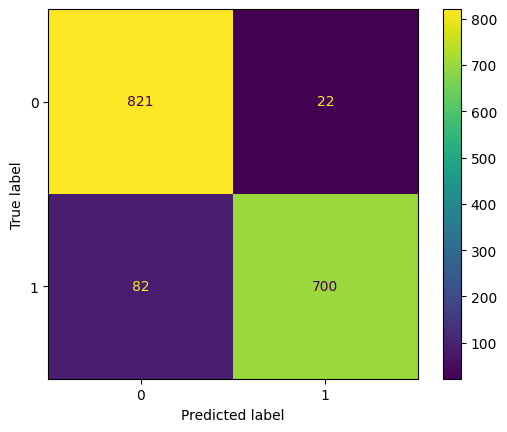

In [132]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_test_pred = voting_clf.predict(X_test)
ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_pred)).plot()

Il modello ha un comportamento ottimo in generale: valori elevati per ogni score.

Il numero di falsi positivi rispetto ad altri modelli è leggermente più elevato.

Un modello che però unisce più classificatori eterogenei tra loro sicuramente è molto più robusto di un singolo classificatore, quindi è un trade-off più che accettabile.

### Bagging Classifier

Un bagging classifier è un metodo di ensemble learning.

Vengono generati diversi sottoinsiemi del dataset originale utilizzando il bootstrap sampling, una tecnica che seleziona campioni con rimpiazzo: quindi alcuni esempi possono essere presi più volte e alcuni potrebbero non essere presi affatto.

Ogni sotto-insieme viene utilizzato per addestrare un modello base separato e quindi i modelli possono essere addestrati in parallelo.

I risultati dei modelli vengono combinati tramite un voto di maggioranza.



#### SVC

In [133]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

base_estimator = SVC()
bag_clf = BaggingClassifier(base_estimator, n_estimators=50, random_state=42)
bag_clf.fit(X_train, y_train)

BaggingClassifier(estimator=SVC(), n_estimators=50, random_state=42)

Comportamento sul training set:

In [134]:
compute_performance(bag_clf, 'SVC_bag', X_train, y_train, ['accuracy', 'precision', 'recall', 'f1'], True, 'train')

{'classifier': 'SVC_bag',
 'accuracy': 0.9689185729524713,
 'precision': 0.9743241354805916,
 'recall': 0.9610600109887872,
 'f1': 0.9675458823733027,
 'Type': 'train'}

Comportamento sul test set:

In [135]:
compute_performance(bag_clf, "SVC_bag",  X_test, y_test, ['accuracy', 'precision', 'recall', 'f1'], False, "test")

{'classifier': 'SVC_bag',
 'accuracy': 0.9692307692307692,
 'precision': 0.9641943734015346,
 'recall': 0.9716494845360825,
 'f1': 0.9679075738125802,
 'Type': 'test'}

Già il modello di base aveva un ottimo comportamento.

Sicuramente un modello che sfrutta il bagging è più robusto in quanto i diversi modelli vengono addestrati su diverse porzioni del dataset.

#### KNN

In [136]:
from sklearn.neighbors import KNeighborsClassifier

base_estimator = KNeighborsClassifier(n_neighbors=50)
bag_clf = BaggingClassifier(base_estimator, n_estimators=50, random_state=42)
bag_clf.fit(X_train, y_train)

BaggingClassifier(estimator=KNeighborsClassifier(n_neighbors=50),
                  n_estimators=50, random_state=42)

Comportamento sul training set

In [137]:
compute_performance(bag_clf, 'KNN_bag', X_train, y_train, ['accuracy', 'precision', 'recall', 'f1'], True, "train")

{'classifier': 'KNN_bag',
 'accuracy': 0.9287578523171744,
 'precision': 0.9301639671545153,
 'recall': 0.9218208827659184,
 'f1': 0.9258787440743446,
 'Type': 'train'}

Comportamento sul test set

In [138]:
compute_performance(bag_clf, 'KNN_bag', X_test, y_test, ['accuracy', 'precision', 'recall', 'f1'], False, "test")

{'classifier': 'KNN_bag',
 'accuracy': 0.9144615384615384,
 'precision': 0.921994884910486,
 'recall': 0.9023779724655819,
 'f1': 0.9120809614168249,
 'Type': 'test'}

Si è deciso di effettuare il bagging con il modello non di default ma con un numero di vicini più elevati in modo da ridurre la complessità. \\
Il modello singolo aveva degli score molto elevati, nel caso di bagging si hanno degli score più bassi il che porta sicuramente ad un aumento della capacità di generalizzazione a fronte di una perdita di precisione.  

### Boosting

Il boosting è una tecnica di ensemble che combina sequenzialmente più modelli deboli; ogni modello nella sequenza corregge gli errori dei modelli precedenti ad ogni iterazione. \\
È riportato il modello più famoso: AdaBoost.



#### AdaBoost

L’approccio adottato da AdaBoost è quello di effettuare boosting correggendo le istanze che sono state underfittate dal precedente modello.

Si utilizza un albero decisionale con una complessità minima: la profondità è pari a 2.

In [139]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

base_clf = DecisionTreeClassifier(max_depth=2, random_state = 42)

ada_clf = AdaBoostClassifier(estimator=base_clf, n_estimators=5, learning_rate=1.0, random_state=42)

Comportamento sul training set

In [140]:
compute_performance(ada_clf, 'AdaBoost_DTree', X_train, y_train, ['accuracy', 'precision', 'recall', 'f1'], True, "train")

{'classifier': 'AdaBoost_DTree',
 'accuracy': 0.959687803721702,
 'precision': 0.962561660913513,
 'recall': 0.9537351702244562,
 'f1': 0.9576857401119797,
 'Type': 'train'}

Comportamento sul test set

In [141]:
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2,
                                                    random_state=42),
                   n_estimators=5, random_state=42)

In [142]:
compute_performance(ada_clf, 'AdaBoost_DTree', X_test, y_test, ['accuracy', 'precision', 'recall', 'f1'], False, "test")

{'classifier': 'AdaBoost_DTree',
 'accuracy': 0.9723076923076923,
 'precision': 0.9833759590792839,
 'recall': 0.9600499375780275,
 'f1': 0.9715729627289955,
 'Type': 'test'}

Si nota come nonostante la bassissima complessità del modello base che è costituito da un decision tree la cui profondità è stata limitata a 2, e il numero ridotto di stimatori, si ottiene un risultato impeccabile.

Sicuramente l'elevata semplicità del problema non rende apprezzabile le reali migliorie che può apportare AdaBoost che comunque è noto per apportare migliorie in termini di robustezza della predizione.

## Confronto classificatori

Per effettuare un confronto finale si sfrutta la struttura dati "result" che è stata mantenuta.

### Accuracy

In [143]:
def plot_comp(dataframe, score):
  dataframe.sort_values(by=[score], inplace=True)
  sns.set(style="whitegrid")

  plt.figure(figsize=(20, 6))
  sns.barplot(x='classifier', y=score, hue='Type', data=dataframe, palette='Set2')

  plt.ylim(0, 1)  # Limita l'asse y tra 0 e 1
  plt.title(f"Confronto classificatori per {score}", size = 18, font = 'serif')
  plt.xlabel('Classifier')
  plt.ylabel(score)
  plt.legend(title='Type', loc='lower right')

  # Modifica dei tick dell'asse x per avere i nomi in verticale
  plt.xticks(rotation=90)

  # Mostra il plot
  plt.show()

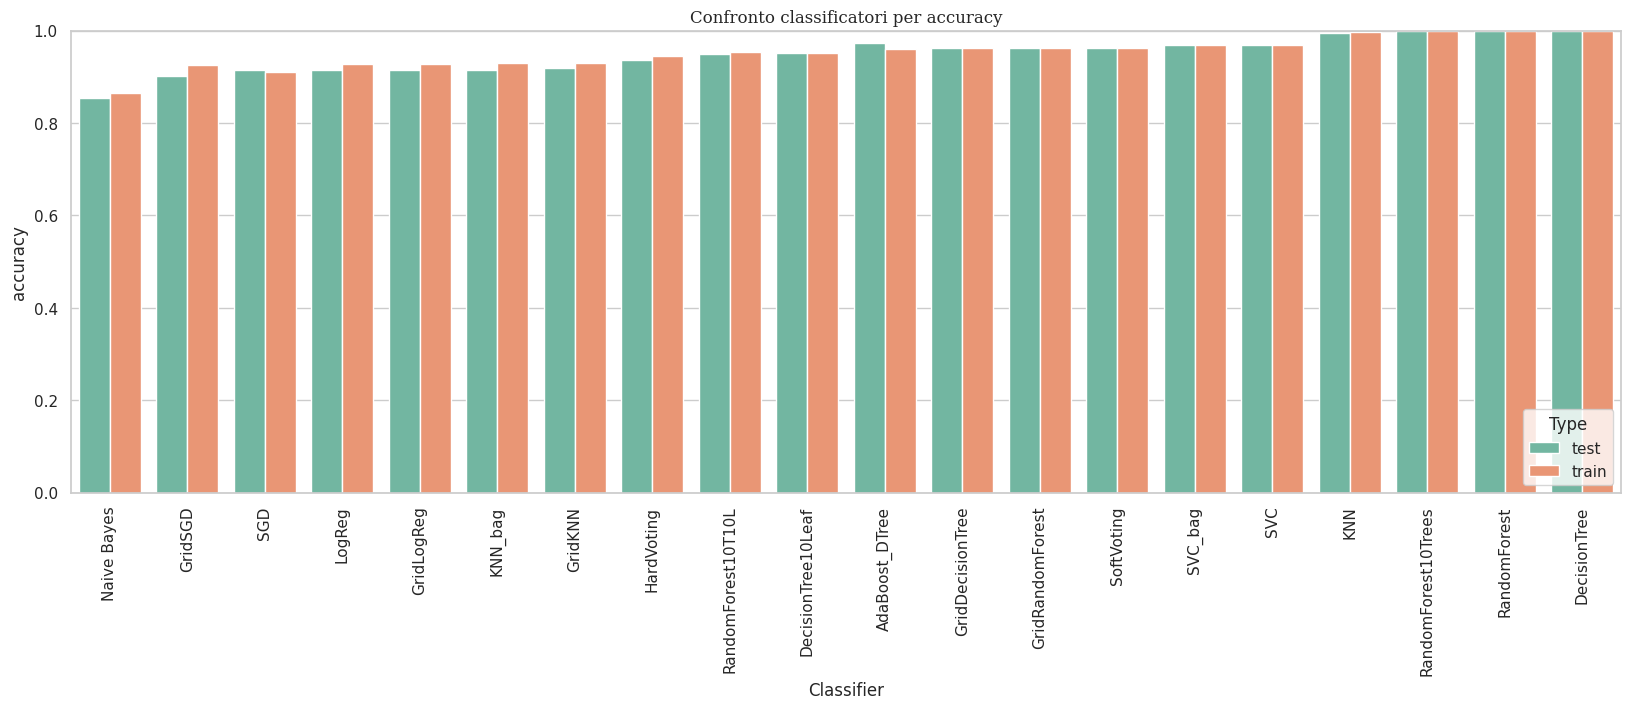

In [144]:
plot_comp(results, "accuracy")

La cosa di cui si è certi è la bassissima difficoltà del problema visti che tutti i classificatori hanno score molto elevati.

Considerando i modelli che si suppone non siano in overfitting, il miglior valore di accuracy viene fornito dalla classificazione tramite Support Vector Machine.

Per avere la sicurezza di non essere in presenza di overfitting si preferiscono modelli più robusti come quelli che sfruttano strategie ensemble in particolare l'hard voting che sfrutta classificatori basati su principi diversi e quindi con una bassa probabilità di essere stati soggetti agli stessi bias.

Il Naive Bayes risulta essere il modello peggiore mentre alcuni modelli di default hanno una elevata complessità che porta ad avere misure di performance pari ad 1.


### Precision

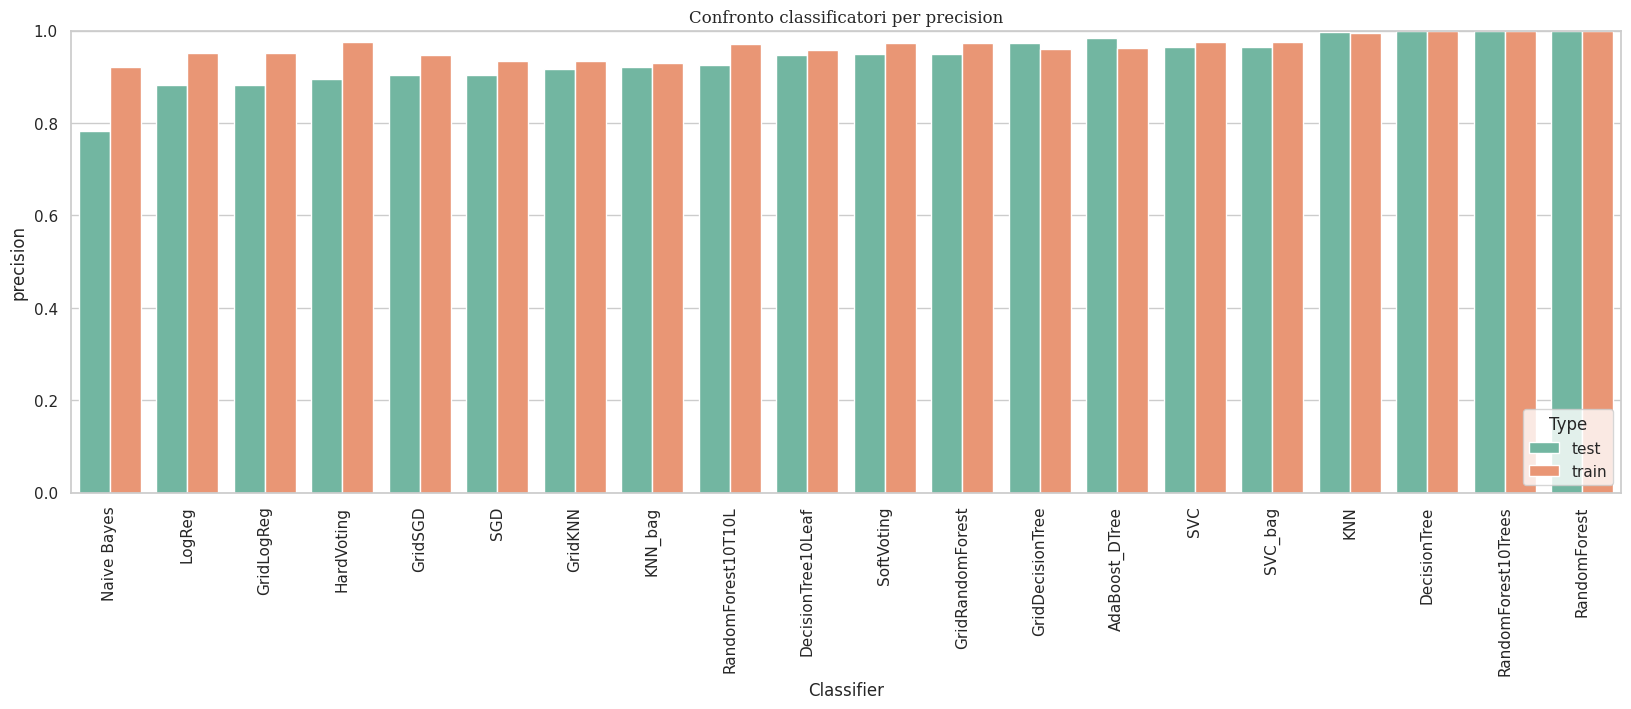

In [145]:
plot_comp(results, "precision")


Non considerando modelli con valori pari ad uno per via dell'ovvie problematiche vista l'assenza di generalizzazione, si effettuano le stesse osservazioni fatte per l'accuracy: tenuta conto dell'elevata semplicità del problema si preferiscono modelli robusti che fanno utilizzo di meccanismi di voting; seppure le SVC, anche in questo caso, presentano i migliori valori.

### Recall

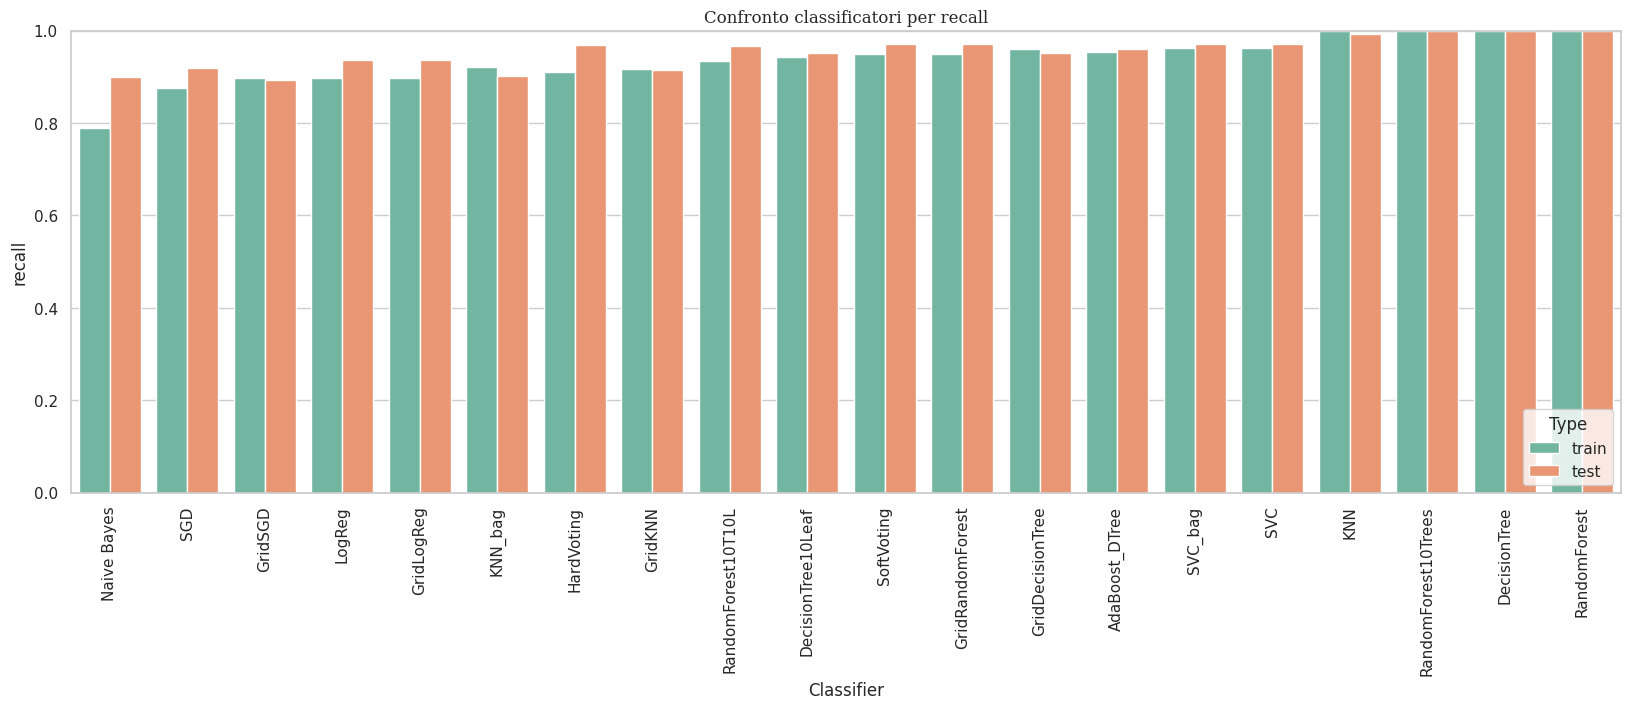

In [146]:
plot_comp(results, "recall")

Anche per quanto riguarda la misura di performance "recall", cioè la frazione di record positivi correttamente etichettati, si nota che il peggior modello è il Naive Bayes mentre tutti gli altri hanno dei valori ottimi a differenza dei modelli con una elevata complessità che portano la misura di performance pari ad 1. Come prima, l'SVC risulta essere il miglior modello di base.

### F1

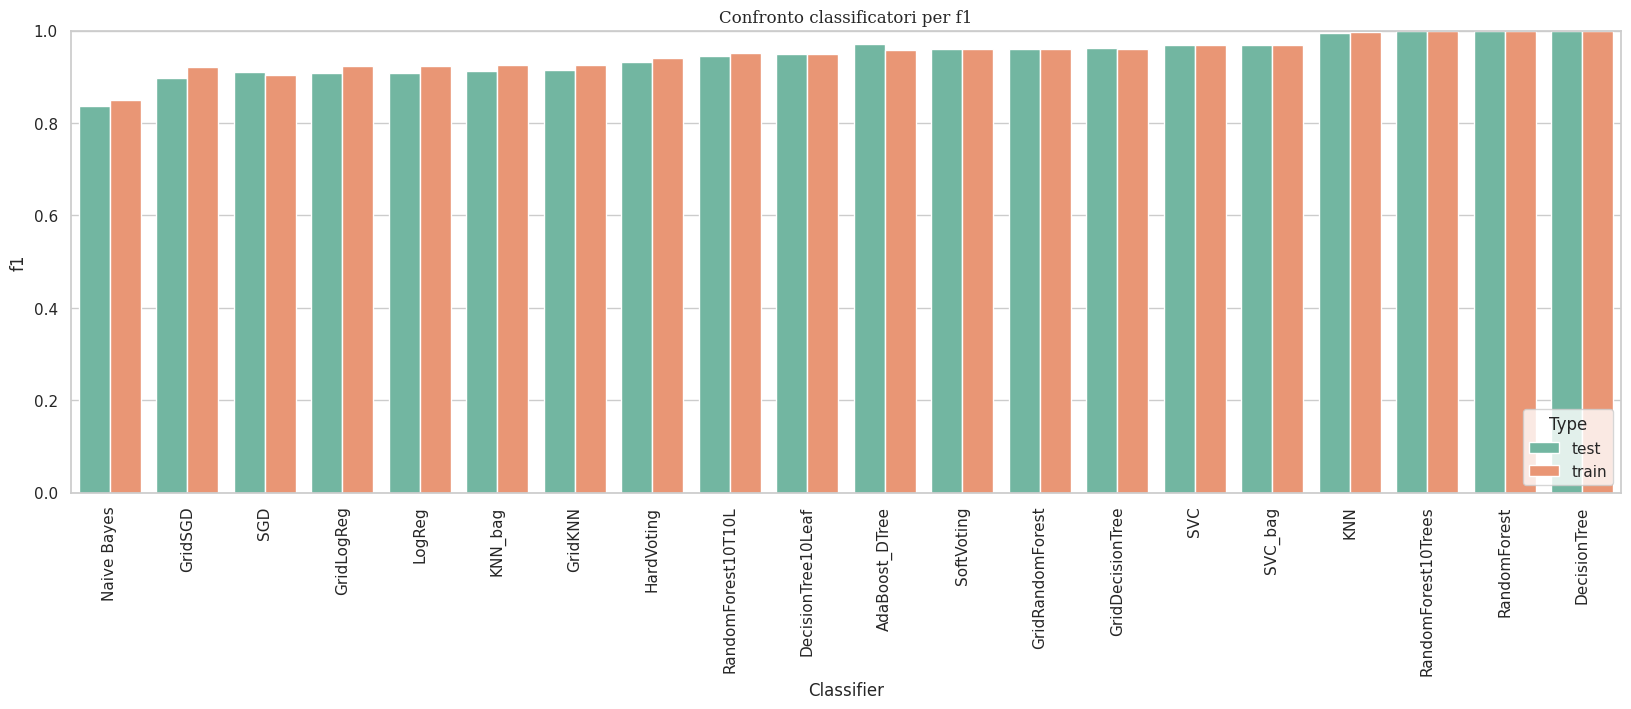

In [147]:
plot_comp(results, "f1")

L'F1 tiene conto sia della precision che della recall.

Come per le altre misure di performance, il modello Naive Bayes risulta il peggiore mentre tutti gli altri modelli hanno un comportamento ottimo.

Si evidenzia come fatto in precedenza, la presenza di modelli decisamente troppo complessi per il problema che ovviamente "memorizzano" il set di dati.

#Reti neurali

Ai fini della classificazione vengono utilizzati anche dei modelli basati su reti neurali.

## Rete neurale Multi-Layer Perceptron (MLP)



Una rete neurale MLP è una tipologia di rete neurale feedforward che consiste di almeno tre strati di neuroni: uno strato di input, uno o più strati nascosti, e uno strato di output.

Ogni neurone in uno strato è connesso a tutti i neuroni dello strato successivo attraverso pesi associati.

Il modello apprende i pesi ottimali durante il processo di addestramento, utilizzando un algoritmo di backpropagation per minimizzare l'errore di previsione.

In particolare, Scikit-learn offre un'implementazione delle reti neurali MLP molto semplice.

Per via dell'estrema semplicità del problema notata nell'analisi dei modelli precedenti, ci si aspetta che anche la rete neurale abbia un comportamento ottimo senza particolari sforzi.

In [150]:
from sklearn.neural_network import MLPClassifier
mlp_clf = MLPClassifier(hidden_layer_sizes=50, early_stopping=True, max_iter=500, random_state=42)
mlp_clf.fit(X_train, y_train)

MLPClassifier(early_stopping=True, hidden_layer_sizes=50, max_iter=500,
              random_state=42)

Il parametro early_stopping del Multi-layer Perceptron (MLP) regola l'uso della tecnica di early stopping durante l'addestramento della rete neurale. L'early stopping è una tecnica che interrompe l'addestramento del modello quando le prestazioni smettono di migliorare, prevenendo così l'overfitting.

In [151]:
compute_performance(mlp_clf, 'MLP', X_train, y_train, ['accuracy', 'precision', 'recall', 'f1'], True, "train")

{'classifier': 'MLP',
 'accuracy': 0.9887670973094702,
 'precision': 0.983351358442149,
 'recall': 0.9936254858468487,
 'f1': 0.9884183468814933,
 'Type': 'train'}

In [152]:
compute_performance(mlp_clf, 'MLP', X_test, y_test, ['accuracy', 'precision', 'recall', 'f1'], False, "test")

{'classifier': 'MLP',
 'accuracy': 0.9895384615384616,
 'precision': 0.9961636828644501,
 'recall': 0.9823455233291298,
 'f1': 0.9892063492063492,
 'Type': 'test'}

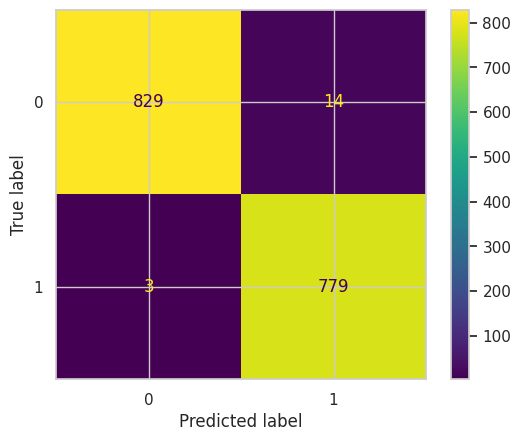

In [153]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_test_pred = mlp_clf.predict(X_test)
ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_pred)).plot()

Come ci si aspettava anche per questo tipo di modello il problema risulta semplice.

Si cercano quindi delle soluzioni per ridurre la complessità del modello e evitare l'overfitting.

###Regolarizzazione L2
Si è effettuata una prova utilizzando la regolarizzazione L2 direttamente sul modello di MLP fornito da scikit-learn.

In particolare, la regolarizzazione L2 aggiunge un termine di penalizzazione alla funzione di costo che è proporzionale alla somma dei quadrati dei pesi del modello.

Nel contesto della regolarizzazione L2, la funzione di perdita regolarizzata può essere scritta come:

\begin{equation}
\mathcal L_{L2}=\mathcal L_0+\lambda\sum_{i=1}^n w_i^2​
\end{equation}
In scikit-learn, questa formula si traduce in:

\begin{equation}
\mathcal L_{L2}=\mathcal L_0+\alpha\sum_{i=1}^n w_i^2​
\end{equation}

Questo fa sì che il modello preferisca soluzioni con pesi più piccoli, il che riduce il rischio di overfitting e migliora la capacità di generalizzazione.

A tale proposito, si fa variare il parametro $\alpha$, che serve proprio a controllare l'intensità della penalizzazione applicata ai pesi del modello.

In [154]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

alpha_values = [0.01, 0.1, 1, 5, 10]

for alpha in alpha_values:
    print(f'Testing alpha={alpha}')
    mlp_clf = MLPClassifier(hidden_layer_sizes=(50,), max_iter=500, alpha=alpha, random_state=42)
    mlp_clf.fit(X_train, y_train)

    print("Training set performance:")
    print(compute_performance(mlp_clf, 'MLP', X_train, y_train, ['accuracy', 'precision', 'recall', 'f1'], True, "train"))

    print("Test set performance:")
    print(compute_performance(mlp_clf, 'MLP', X_test, y_test, ['accuracy', 'precision', 'recall', 'f1'], False, "test"),"\n")

Testing alpha=0.01
Training set performance:
{'classifier': 'MLP', 'accuracy': 0.9992305321796847, 'precision': 1.0, 'recall': 0.9984045908711666, 'f1': 0.9992005079131395, 'Type': 'train'}
Test set performance:
{'classifier': 'MLP', 'accuracy': 0.9987692307692307, 'precision': 0.9974424552429667, 'recall': 1.0, 'f1': 0.998719590268886, 'Type': 'test'} 

Testing alpha=0.1
Training set performance:
{'classifier': 'MLP', 'accuracy': 0.9983069811544387, 'precision': 0.9990425445043278, 'recall': 0.9974481593781158, 'f1': 0.9982425477576685, 'Type': 'train'}
Test set performance:
{'classifier': 'MLP', 'accuracy': 0.9975384615384615, 'precision': 0.9948849104859335, 'recall': 1.0, 'f1': 0.9974358974358974, 'Type': 'test'} 

Testing alpha=1
Training set performance:
{'classifier': 'MLP', 'accuracy': 0.9792272134645017, 'precision': 0.9725115675550647, 'recall': 0.9850023402047171, 'f1': 0.978640420730245, 'Type': 'train'}
Test set performance:
{'classifier': 'MLP', 'accuracy': 0.981538461538

Quello che possiamo notare, è che le performance inizialmente migliorano all'aumentare dell'intensità della penalizzazione, fino a un punto in cui peggiorano. In particolare il risultato migliore lo si ottiene con $\alpha = 1$.

##TensorFlow/Keras
Si prosegue con l'implementazione di una rete neurale "custom" con TensorFlow/Keras.

La rete in questione presenta 3 livelli con 4 neuroni per i primi due livelli, (in cui si utilizza la funzione relu per non creare linearità) e un neurone nel livello di output (sufficiente un solo neurone poiché la classificazione è binaria e si può utilizzare la funzione sigmoide).

Si evidenzia la presenza di due iperparametri: "batch_size" e "epochs":
* batch_size si riferisce al numero di campioni di addestramento utilizzati in un'iterazione: si è scelto di utilizzarne 32
* epochs rappresenta il numero di volte in cui l'intero dataset viene passato attraverso la rete neurale durante l'addestramento.  \\
In ogni epoca, il modello ottimizza i pesi delle connessioni tra i neuroni, cercando di migliorare le sue prestazioni rispetto alla funzione di costo.

Dopo alcune prove (in particolare con 100 e 50) si è scelto di impostare il numero di epoche a 25.

In [155]:
import tensorflow as tf

input_dim = X_train.shape[1]

model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu', input_shape=(input_dim,)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid') #livello di output
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

epochs = 25
batch_size = 32

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))

Epoch 1/25
204/204 [==============================] - 2s 4ms/step - loss: 0.7152 - accuracy: 0.6042 - val_loss: 0.6281 - val_accuracy: 0.7065
Epoch 2/25
204/204 [==============================] - 1s 4ms/step - loss: 0.5680 - accuracy: 0.7355 - val_loss: 0.4887 - val_accuracy: 0.7963
Epoch 3/25
204/204 [==============================] - 1s 5ms/step - loss: 0.4311 - accuracy: 0.8300 - val_loss: 0.3975 - val_accuracy: 0.8338
Epoch 4/25
204/204 [==============================] - 1s 5ms/step - loss: 0.3609 - accuracy: 0.8620 - val_loss: 0.3620 - val_accuracy: 0.8480
Epoch 5/25
204/204 [==============================] - 1s 5ms/step - loss: 0.3311 - accuracy: 0.8732 - val_loss: 0.3420 - val_accuracy: 0.8615
Epoch 6/25
204/204 [==============================] - 1s 4ms/step - loss: 0.3089 - accuracy: 0.8828 - val_loss: 0.3254 - val_accuracy: 0.8757
Epoch 7/25
204/204 [==============================] - 1s 3ms/step - loss: 0.2913 - accuracy: 0.8944 - val_loss: 0.3132 - val_accuracy: 0.8831
Epoch 

In questo caso ci si trova in una situazione in cui il modello si comporta bene sul training set ma peggiora leggermente sul test set, che potrebbe essere la risultante di un problema di overfitting.

Si va quindi a cercare di aumentare capacità di generalizzazione del modello riducendo l'overfitting tramite la tecnica del Dropout.

### Dropout
Il dropout è una tecnica che consiste nel disabilitare casualmente un numero di neuroni durante l'addestramento della rete.

Questo significa che durante ogni passaggio dell'addestramento, alcune unità vengono temporaneamente ignorate insieme ai loro collegamenti.


Nel caso particolare,  durante ogni passo di addestramento, il 20% dei neuroni nel layer su cui è applicato il dropout sarà "spento" o ignorato in modo casuale.

Teoricamente questo dovrebbe ridurre il rischio di overfitting aumentando la capacità di generalizzazione del modello.


In [161]:
import tensorflow as tf

input_dim = X_train.shape[1]

ann_dropout = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu', input_shape=(input_dim,)),
    tf.keras.layers.Dropout(0.2),  #  Dropout con rate 0.2
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dropout(0.2),  # Dropout con rate 0.2
    tf.keras.layers.Dense(1, activation='sigmoid')
])

ann_dropout.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

epochs = 25
batch_size = 32


history = ann_dropout.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))

Epoch 1/25
204/204 [==============================] - 2s 5ms/step - loss: 0.6786 - accuracy: 0.5564 - val_loss: 0.6389 - val_accuracy: 0.7052
Epoch 2/25
204/204 [==============================] - 1s 4ms/step - loss: 0.6328 - accuracy: 0.6323 - val_loss: 0.5808 - val_accuracy: 0.7920
Epoch 3/25
204/204 [==============================] - 1s 3ms/step - loss: 0.5900 - accuracy: 0.6955 - val_loss: 0.5234 - val_accuracy: 0.8166
Epoch 4/25
204/204 [==============================] - 1s 3ms/step - loss: 0.5392 - accuracy: 0.7363 - val_loss: 0.4766 - val_accuracy: 0.8308
Epoch 5/25
204/204 [==============================] - 1s 2ms/step - loss: 0.5179 - accuracy: 0.7417 - val_loss: 0.4572 - val_accuracy: 0.8326
Epoch 6/25
204/204 [==============================] - 1s 3ms/step - loss: 0.4934 - accuracy: 0.7657 - val_loss: 0.4159 - val_accuracy: 0.8572
Epoch 7/25
204/204 [==============================] - 0s 2ms/step - loss: 0.4674 - accuracy: 0.7797 - val_loss: 0.4049 - val_accuracy: 0.8714
Epoch 

Come si può vedere, attraverso la tecnica del dropout si arriva a ottimi risultati. Il modello infatti, in base ai risultati sul training set, riesce a generalizzare molto bene ottenendo ottimi risultati sul test set.

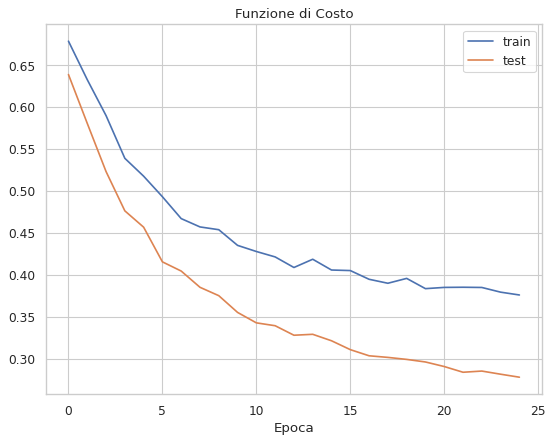

In [162]:
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.title('Funzione di Costo')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel('Epoca')
plt.legend()
plt.show()

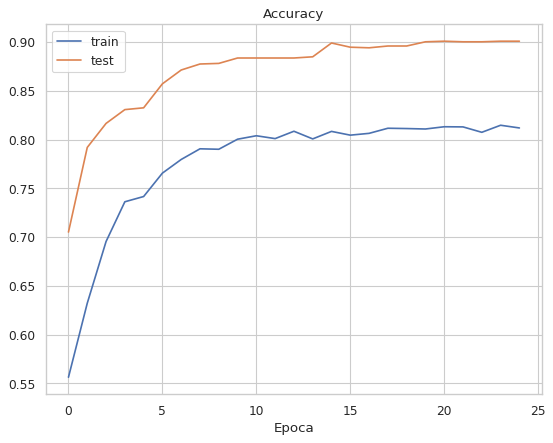

In [163]:
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.xlabel('Epoca')
plt.legend()
plt.show()

# Conclusioni

L'obiettivo iniziale era individuare il miglior modello per la classificazione.

Prima di addestrare i modelli è stato eseguito un flusso di lavoro articolato in più fasi necessarie a comprendere i dati e mettere a disposizione dei modelli dati di qualità e nel formato corretto.

La prima fase è stata quella di analizzare la distribuzione dell'attributo di classe e le distribuzioni delle feature ponendo l'attenzione sulla quantità di istanze (divise per etichetta) per ogni valore della feature in modo da avere un'idea circa potenziali correlazioni.

Tale fase è stata seguita da una fase di pre-processing necessaria in quanto il dataset è composto interamente da variabili categoriali. <br>
La scelta della codifica delle variabili è ricaduta su una codifica intera in quanto l'opzione One-Hot-Encoding portava il dataset ad una dimensionalità molto elevata.

Con a disposizione un set di dati maneggiabile si è effettuata un'analisi della correlazione; come misura di correlazione si è utilizzata la V di Cramer in quanto specifica per le variabili categoriali (a differenza del coefficiente di Pearson che sarebbe risultato inadatto). \\
Grazie a quest'analisi è stato possibile ridurre la dimensionalità del dataset non considerando variabili altamente correlate tra loro e quindi eliminando informazioni ridondanti e variabili associate strettamente con la variabile target.

Con un dataset "pulito" si è passati alla fase di addestramento e valutazione dei modelli in seguito a una divisione del dataset in training set e test set necessaria a testare i modelli.

Le tecniche di classificazione analizzate sono state le seguenti:

*   Naive Bayes
*   SGD
*   Regressione logistica
*   KNN
*   Ensemble   
  * Voting
     * Soft Voting
     * Hard Voting
  *   Bagging
  *   Boosting

Dalla fase di addestramento e valutazione dei modelli si è riscontrata una elevata semplicità del problema per via dei risultati eccellenti che si riscontravano con modelli di default senza ottimizzazioni di parametri ricercate attraverso la grid search.

Quindi nell'addestramento di ogni modello si è cercato di ridurre la complessità ai minimi termini e ciò ha portato comunque a degli ottimi risultati.

Ai fini della classificazione sono state utilizzate e analizzate delle reti neurali:
* Multi-Layer Perceptron (Scikit-learn)
* TensorFlow/Keras

Per quanto riguarda le reti neurali, su quella inizialmente analizzata  (Multi-Layer Perceptron), si è cercato di ridurre la complessità tramite una regolarizzazione L2.
Sul secondo tipo di rete neurale analizzata, è stata utilizzata la tecnica del dropout. Entrambi i tentativi di migliorare la capacità di generalizzazione hanno fornito buoni risultati.

Il comportamento dei modelli "di base" è ottimale per tutte le misure di performance.

Per via dell'elevata semplicità del modello si preferisce "puntare" su modelli più robusti come le strategie ensemble che portano con sé una maggiore robustezza.

Di interesse era essere molto robusti circa l'errore del primo tipo ovvero classificare un fungo velenoso come commestibile.

Le reti neurali d'altra parte hanno restituito buoni risultati. La rete MLP fornisce risultati discreti dopo la regolarizzazione L2, in particolare i risultati migliori si trovano con un valore di α pari a 1.
La rete implementata tramite TensorFlow è stata analizzata solo in termini di accuracy, in particolare dopo la riduzione della complessità determinata dal dropout, i risultati ottenuti risultano molto buoni.